# Exploration

### Imports

In [186]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

import warnings

#### Message d'avertissement

In [187]:
warnings.filterwarnings("ignore")

#### Dimension DataFramme

In [188]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

### Pré-exploration fichier

In [189]:
data = pd.read_csv('./Data/2016_Building_Energy_Benchmarking.csv')

In [190]:
data.shape

(3376, 46)

In [191]:
data.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [192]:
data["ComplianceStatus"].value_counts()

Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: ComplianceStatus, dtype: int64

In [193]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

### Variables d'intérêt 

In [194]:
var = ['OSEBuildingID', 'PropertyName',
       'BuildingType',
       'PrimaryPropertyType','ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'CouncilDistrictCode', 'Neighborhood','Latitude','Longitude',
       'DataYear', 'YearBuilt',
       'NumberofBuildings',
       'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)',
       'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions']

In [195]:
df = data[var]
df.shape

(3376, 25)

<AxesSubplot:>

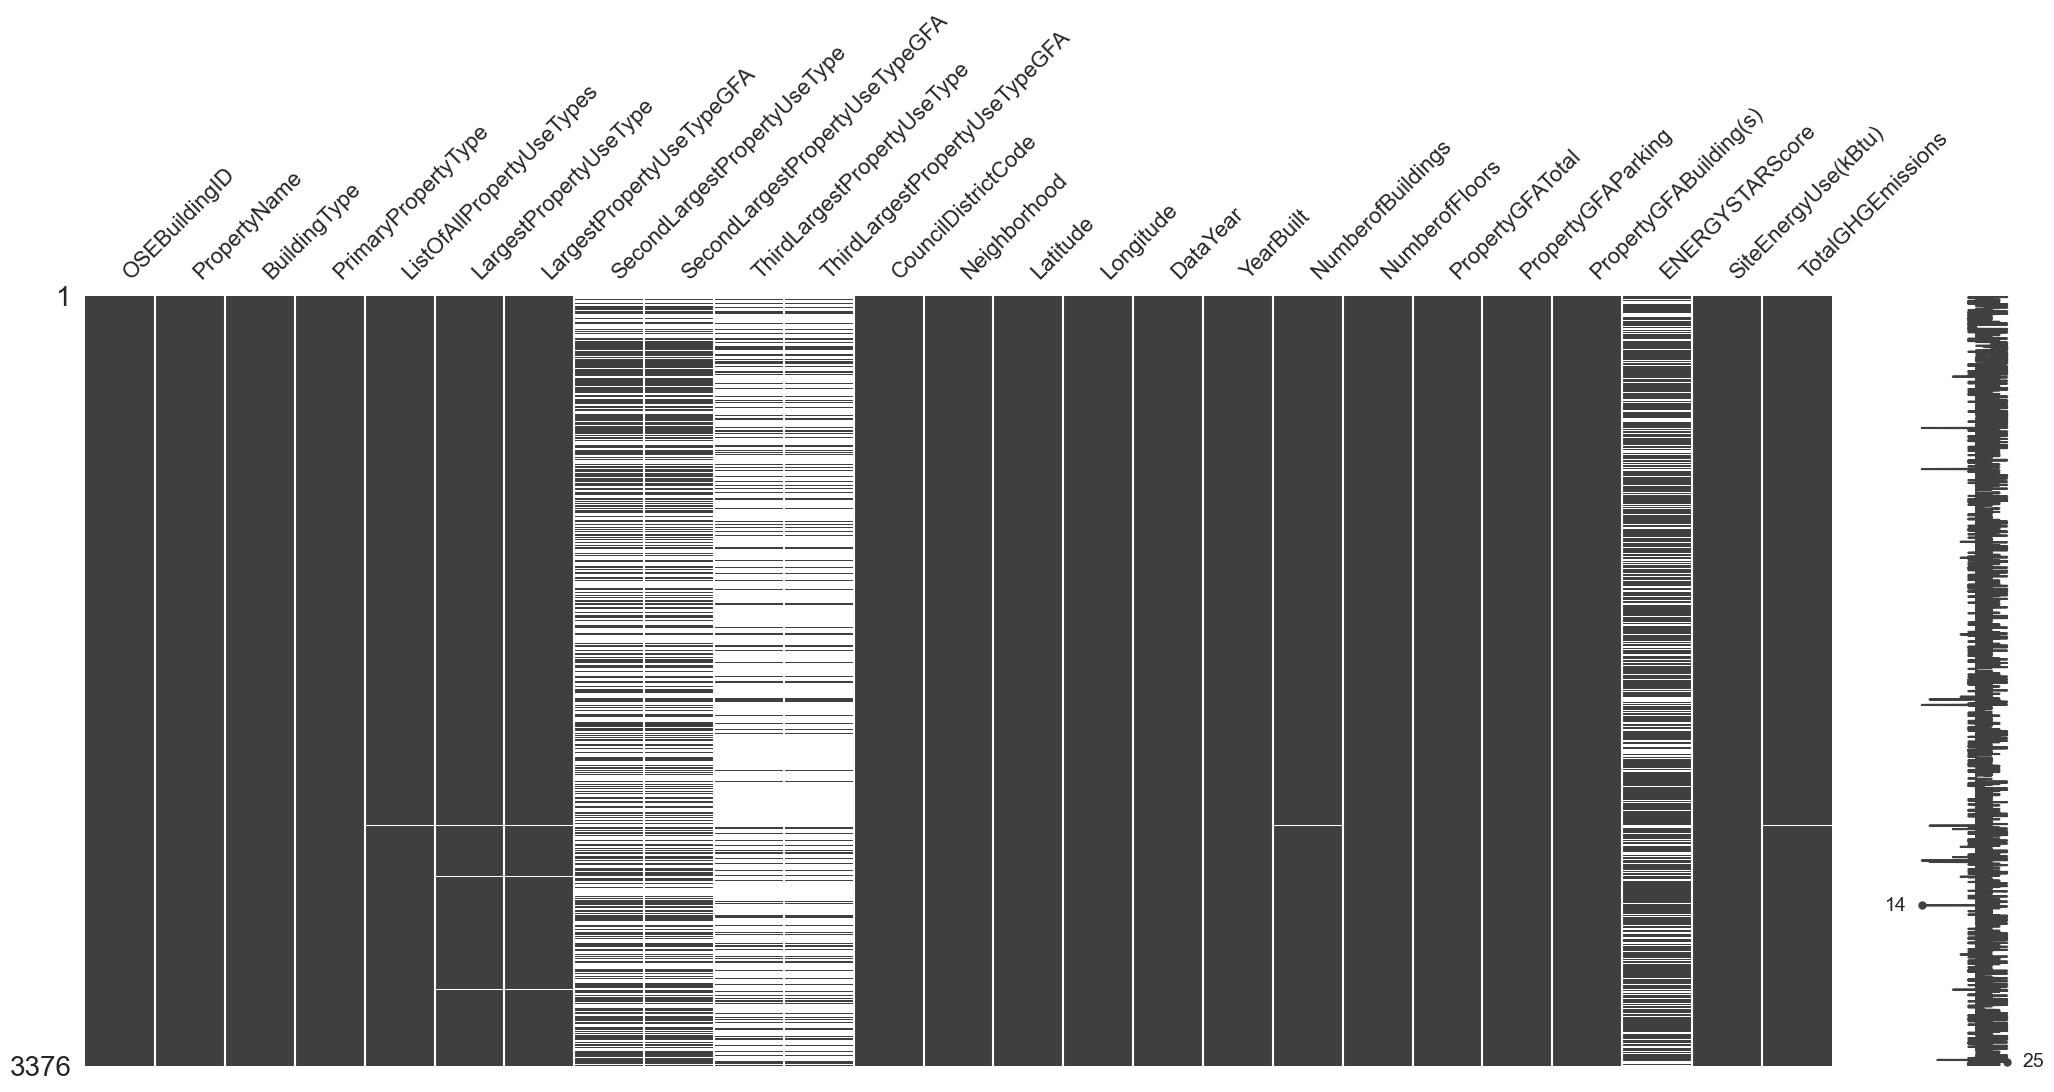

In [196]:
msno.matrix(df)

## Filtre des Etablissements

In [197]:
df['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [198]:
build = ['Multifamily LR (1-4)','Multifamily MR (5-9)','Multifamily HR (10+)']

df_build = df.loc[df['BuildingType'].isin(build)]
df_build.shape

(1708, 25)

In [199]:
df.drop(df_build.index, axis=0, inplace=True)

In [200]:
df['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [201]:
hab = ['Low-Rise Multifamily',
       'Residence Hall']

df_hab = df.loc[df['PrimaryPropertyType'].isin(hab)]
df_hab.shape

(24, 25)

In [202]:
df.drop(df_hab.index, axis=0, inplace=True)

In [203]:
df_mix = df.loc[df['PrimaryPropertyType'] == 'Mixed Use Property']
df_mix

OSEBuildingID                                     PropertyName  \
18               24                                 The Rainier Club   
35               43                                     Plant 2 Site   
47               60                                    Mann Building   
65               96                                  Central Seattle   
164             264                                          TriBeCa   
198             318                                          Pier 54   
246             371                  METROPOLITAN PARK NORTH (ID371)   
249             374                                  ECONET (ID#374)   
264             391                                    Thaw Building   
288             418                             Harold Poll Building   
289             419                                      Main Market   
301             432                       Securities Building Campus   
308             439                     Fisher Plaza - East Building   
309             440                     Fisher Plaza - West Building   
341             480                              307 Westlake - SEDO   
344             484                             Fred Rogers Building   
346             488                    UW Medicine Research Phase II   
373             525                               Seattle Art Museum   
395             551                                   Richmark Label   
410             569                                    Pacific Tower   
413             572                                  Bright Horizons   
429             588                                    1616 Eastlake   
440             601                               Wallingford Center   
441             602                                       199 Blaine   
459             620                        Pacific Office Automation   
474             637                        Stadium Innovation Center   
488             657                             2200 Westlake - SEDO   
541             731                          SALVATION ARMY (ID#731)   
549             742                                    1100 Eastlake   
565             759                                       Oddfellows   
604             806                               US Rubber Building   
612             817                                     Russell Hall   
620             830                                       childhaven   
640            1280                     Filson World Headquarters LP   
656           19472  Puget Sound Energy Georgetown Operations Center   
784           19857                               Good Arts Building   
785           19858                                       Marion 823   
796           19876                                        U.S. BANK   
830           19928                           Olympic Sculpture Park   
887           20141                                  WALDEN BUILDING   
911           20211                       Miller-Barringham Building   
912           20212                           Market Street Holdings   
968           20387                           Marine Business Center   
985           20427     Lyon's Antique Mall - Windermere/Garlic Jims   
986           20428         Matador/Jak's Grill/8 Limbs Yoga/Fitness   
1000          20470                 Lake City Center - Main Building   
1134          21023             George Pocock Memorial Rowing Center   
1159          21122                   Fremont Court-Equinox Building   
1165          21138                                  Saturn Building   
1214          21270            Rex Land Building (Block 56SE) - SEDO   
1266          21391                         On Ballard- 425 Westlake   
1288          21459                                          Century   
1297          21478                                   Economy Market   
1306          21488                            E0010 - Elliott Court   
1309          21496                           

In [204]:
df_mix = df_mix.loc[(df_mix['LargestPropertyUseType'] == 'Multifamily Housing')|
           (df_mix['SecondLargestPropertyUseType'] == 'Multifamily Housing')|
           (df_mix['ThirdLargestPropertyUseType'] == 'Multifamily Housing')]
df_mix.shape

(24, 25)

In [205]:
df.drop(df_mix.index, axis=0, inplace=True)

In [206]:
df.loc[df['PrimaryPropertyType'] == 'Other']

OSEBuildingID                                       PropertyName  \
5                 9                                      West Precinct   
7                11                                  Paramount Theatre   
15               21       The Seattle Public Library - Central Library   
16               22                              Downtown Seattle YMCA   
20               26                             King County Courthouse   
21               27                  King County Correctional Facility   
25               31                                      Seattle Honda   
45               58                                    1525 4th Avenue   
69              103                                          Key Arena   
70              104                              Bagley Wright Theatre   
71              106                                             Armory   
73              110                                    Exhibition Hall   
74              111                                       Mercer Arena   
75              112                                         McCaw Hall   
89              131                                           Lakeview   
90              132                                   Roosevelt Square   
97              145                                      Benaroya Hall   
100             163                            Fire Station 10/FAC/EOC   
101             167                                   Wing Luke Museum   
107             174                        CSC Vehicle Maintenance (E)   
113             180                                         Hope Place   
117             187                              Youth Services Center   
119             338                          Jack R. McDonald Building   
122             195                                  Seattle-Northgate   
125             200                                Verity Credit Union   
140             228                                   Webster Building   
145             233                                    Armory Building   
155             245                                        CenturyLink   
158             249                                       Safeco Field   
163             263                                         Building 1   
185             293                                        ACT Theatre   
187             295                                       1122 3rd Ave   
192             302                           Seattle ReadCntr (50/50)   
195             315  P66 Bell Harbor International Conference Cente...   
197             317                                   Seattle Aquarium   
240             365                               UW Tower Data Center   
266             393                                           500 Yale   
290             420                                    Meridian (West)   
291             421                                    Meridian (East)   
298             428                                             Lenora   
303             434      Benaroya Research Institute at Virginia Mason   
304             435                 Washington State Convention Center   
305             436  VM Seattle Hospital & Medical Center - Health ...   
329             466  VM Seattle Hospital & Medical Center - Buck Pa...   
340             477                        Weintraub/Hutchinson/Thomas   
358             504                                         Westbridge   
360             508                             The Park View Building   
361             513                                            Q13 FOX   
364             516                             Aurora Shopping Center   
379             532                                   Ballard Blocks I   
399             555                  Cascade Designs Inc. ( Yosemite )   
408             566                                            Pike St   
417             576                                  Northgate Village   
422       

In [207]:
df.shape

(1620, 25)

In [208]:
def visu(dataf) : # Fonction visualisation du taux de remplissage
    df = pd.DataFrame(index=['Valeurs manquantes','Nombre de valeurs' ,'Taux de remplissage','Valeurs différentes'], columns= dataf.columns )
    
    for v in dataf.columns:
        #Somme des valeurs manquantes
        df.loc['Valeurs manquantes', v] = dataf[v].isnull().sum()
        # Nombre de valeurs 
        df.loc['Nombre de valeurs', v] = dataf.shape[0] - dataf[v].isnull().sum()
        #Taux de remplissage en %
        df.loc['Taux de remplissage', v] =((dataf.shape[0]- dataf[v].isnull().sum())/(dataf.shape[0]*1.0))*100 
        # Nombre de valeurs différentes
        df.loc['Valeurs différentes', v] = dataf[v].nunique()
        
    df1 = df.T #Tranposition du Dataframe
    # Conversion du type des colonnes
    df1['Valeurs manquantes'] = df1['Valeurs manquantes'].astype(int) 
    df1['Nombre de valeurs'] = df1['Nombre de valeurs'].astype(int)
    df1['Taux de remplissage'] = df1['Taux de remplissage'].astype(float)
    df1['Valeurs différentes'] = df1['Valeurs différentes'].astype(int)
    df1 = df1.sort_values(by=['Taux de remplissage'], ascending = False)
    
    plt.figure(figsize= (10,12))
    sns.set_theme()
    sns.barplot(x=df1["Taux de remplissage"], y=df1.index)#, palette="YlOrBr_r")
    plt.xlabel("Taux de remplissage en (%)", fontsize=13)
    plt.ylabel("Colonnes", fontsize=13)
    plt.title("Taux de replissage des colonnes", fontsize=16)
    plt.axvline(x=20, color='w')
    plt.axvline(x=80, color='w')
    
    plt.show()
    
    return df
    

<AxesSubplot:>

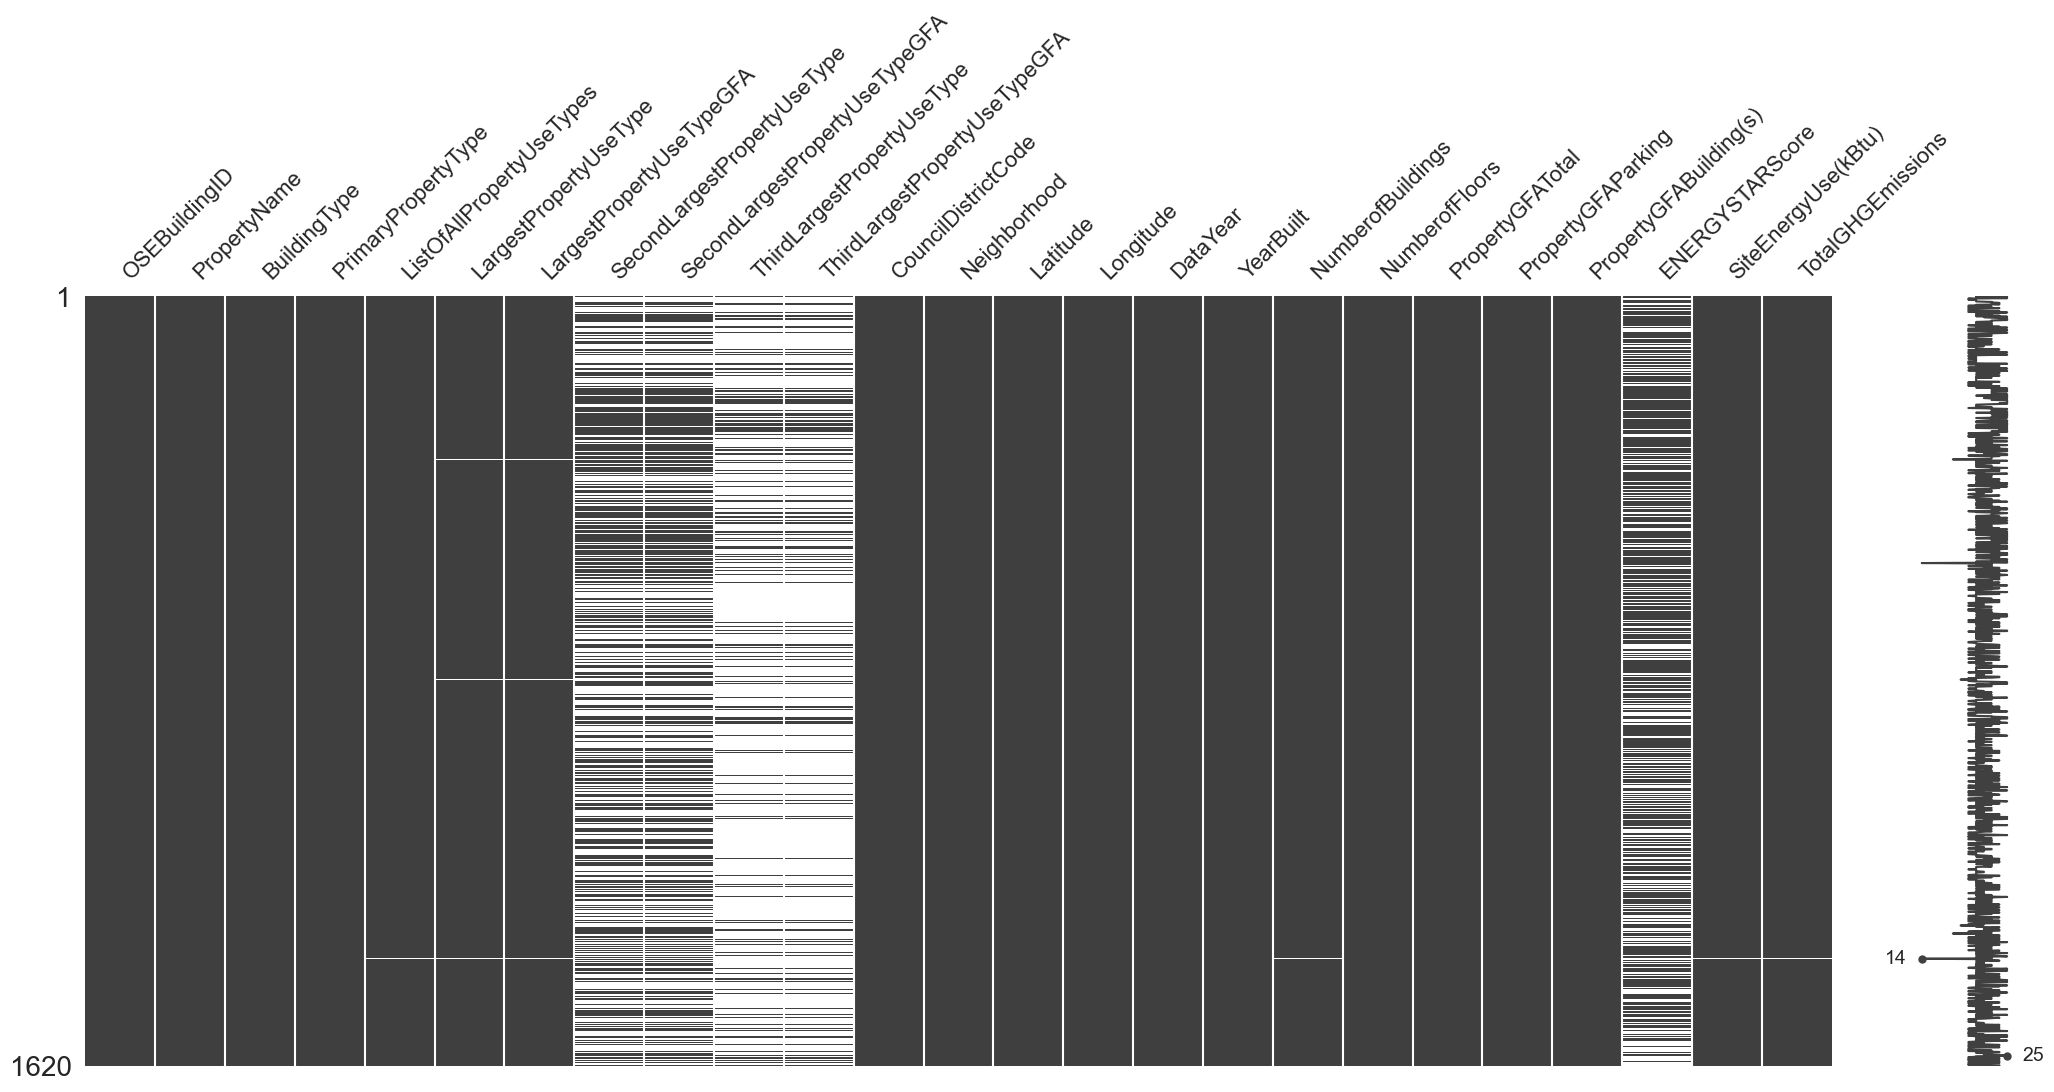

In [209]:
msno.matrix(df)

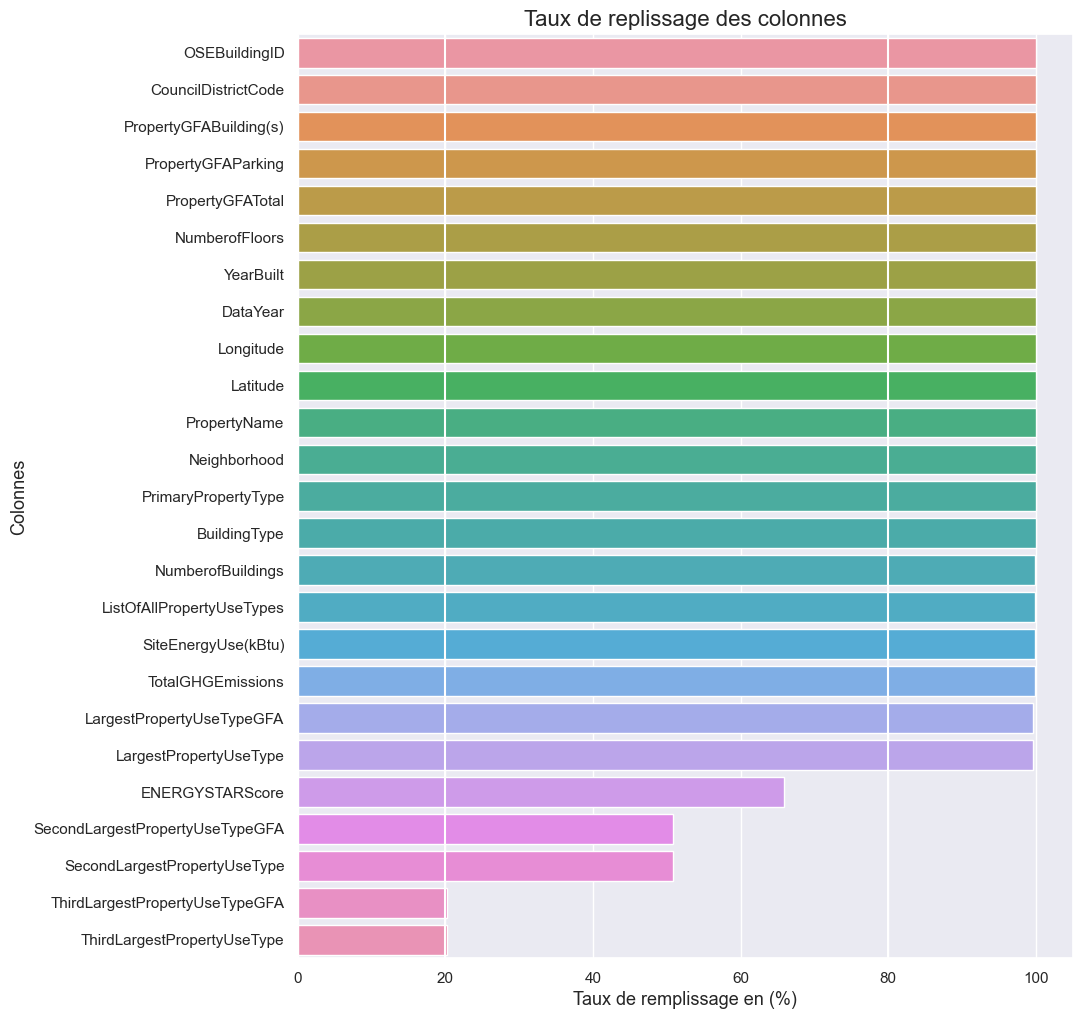

OSEBuildingID PropertyName BuildingType  \
Valeurs manquantes              0            0            0   
Nombre de valeurs            1620         1620         1620   
Taux de remplissage         100.0        100.0        100.0   
Valeurs différentes          1620         1616            5   

                    PrimaryPropertyType ListOfAllPropertyUseTypes  \
Valeurs manquantes                    0                         2   
Nombre de valeurs                  1620                      1618   
Taux de remplissage               100.0                 99.876543   
Valeurs différentes                  20                       343   

                    LargestPropertyUseType LargestPropertyUseTypeGFA  \
Valeurs manquantes                       6                         6   
Nombre de valeurs                     1614                      1614   
Taux de remplissage               99.62963                  99.62963   
Valeurs différentes                     54                      1518   

                    SecondLargestPropertyUseType  \
Valeurs manquantes                           797   
Nombre de valeurs                            823   
Taux de remplissage                    50.802469   
Valeurs différentes                           47   

                    SecondLargestPropertyUseTypeGFA  \
Valeurs manquantes                              797   
Nombre de valeurs                               823   
Taux de remplissage                       50.802469   
Valeurs différentes                             671   

                    ThirdLargestPropertyUseType  \
Valeurs manquantes                         1293   
Nombre de valeurs                           327   
Taux de remplissage                   20.185185   
Valeurs différentes                          38   

                    ThirdLargestPropertyUseTypeGFA CouncilDistrictCode  \
Valeurs manquantes                            1293                   0   
Nombre de valeurs                              327                1620   
Taux de remplissage                      20.185185               100.0   
Valeurs différentes                            279                   7   

                    Neighborhood Latitude Longitude DataYear YearBuilt  \
Valeurs manquantes             0        0         0        0         0   
Nombre de valeurs           1620     1620      1620     1620      1620   
Taux de remplissage        100.0    100.0     100.0    100.0     100.0   
Valeurs différentes           19     1454      1371        1       113   

                    NumberofBuildings NumberofFloors PropertyGFATotal  \
Valeurs manquantes                  2              0                0   
Nombre de valeurs                1618           1620             1620   
Taux de remplissage         99.876543          100.0            100.0   
Valeurs différentes                16             44             1544   

                    PropertyGFAParking PropertyGFABuilding(s) ENERGYSTARScore  \
Valeurs manquantes                   0                      0             554   
Nombre de valeurs                 1620                   1620            1066   
Taux de remplissage              100.0                  100.0       65.802469   
Valeurs différentes                315                   1539             100   

                    SiteEnergyUse(kBtu) TotalGHGEmissions  
Valeurs manquantes                    2                 2  
Nombre de valeurs                  1618              1618  
Taux de remplissage           99.876543         99.876543  
Valeurs différentes                1603              1549

In [210]:
visu(df)

In [211]:
df_miss = df.loc[df['LargestPropertyUseType'].isnull()]

for l,r in df_miss.iterrows():
    df.loc[l, 'LargestPropertyUseType'] = df.loc[l, 'PrimaryPropertyType']

In [212]:
values= {'SecondLargestPropertyUseType': 'NotOtherUse','ThirdLargestPropertyUseType':'NotOtherUse',
         'SecondLargestPropertyUseTypeGFA': 0, 'ThirdLargestPropertyUseTypeGFA': 0}
df.fillna(value=values, inplace = True)

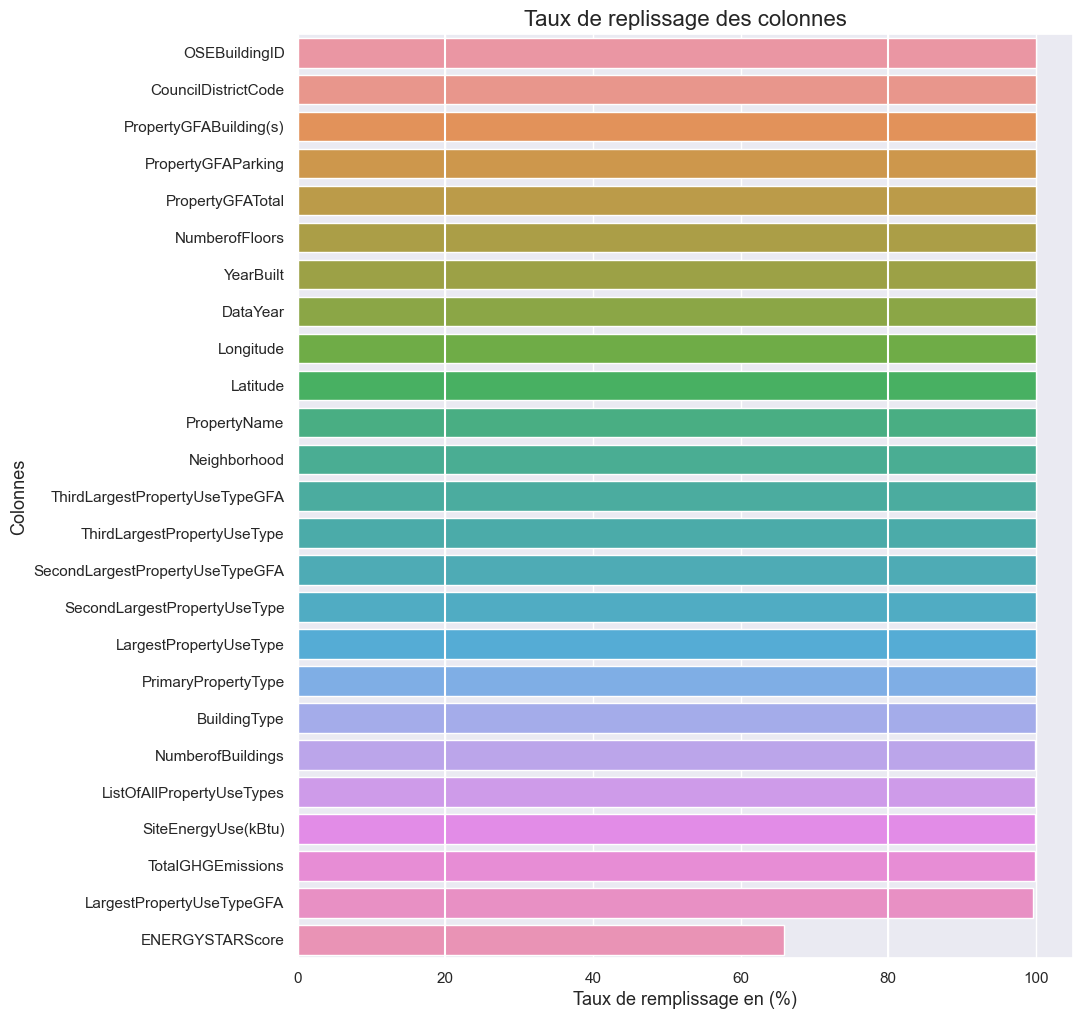

OSEBuildingID PropertyName BuildingType  \
Valeurs manquantes              0            0            0   
Nombre de valeurs            1620         1620         1620   
Taux de remplissage         100.0        100.0        100.0   
Valeurs différentes          1620         1616            5   

                    PrimaryPropertyType ListOfAllPropertyUseTypes  \
Valeurs manquantes                    0                         2   
Nombre de valeurs                  1620                      1618   
Taux de remplissage               100.0                 99.876543   
Valeurs différentes                  20                       343   

                    LargestPropertyUseType LargestPropertyUseTypeGFA  \
Valeurs manquantes                       0                         6   
Nombre de valeurs                     1620                      1614   
Taux de remplissage                  100.0                  99.62963   
Valeurs différentes                     56                      1518   

                    SecondLargestPropertyUseType  \
Valeurs manquantes                             0   
Nombre de valeurs                           1620   
Taux de remplissage                        100.0   
Valeurs différentes                           48   

                    SecondLargestPropertyUseTypeGFA  \
Valeurs manquantes                                0   
Nombre de valeurs                              1620   
Taux de remplissage                           100.0   
Valeurs différentes                             671   

                    ThirdLargestPropertyUseType  \
Valeurs manquantes                            0   
Nombre de valeurs                          1620   
Taux de remplissage                       100.0   
Valeurs différentes                          39   

                    ThirdLargestPropertyUseTypeGFA CouncilDistrictCode  \
Valeurs manquantes                               0                   0   
Nombre de valeurs                             1620                1620   
Taux de remplissage                          100.0               100.0   
Valeurs différentes                            279                   7   

                    Neighborhood Latitude Longitude DataYear YearBuilt  \
Valeurs manquantes             0        0         0        0         0   
Nombre de valeurs           1620     1620      1620     1620      1620   
Taux de remplissage        100.0    100.0     100.0    100.0     100.0   
Valeurs différentes           19     1454      1371        1       113   

                    NumberofBuildings NumberofFloors PropertyGFATotal  \
Valeurs manquantes                  2              0                0   
Nombre de valeurs                1618           1620             1620   
Taux de remplissage         99.876543          100.0            100.0   
Valeurs différentes                16             44             1544   

                    PropertyGFAParking PropertyGFABuilding(s) ENERGYSTARScore  \
Valeurs manquantes                   0                      0             554   
Nombre de valeurs                 1620                   1620            1066   
Taux de remplissage              100.0                  100.0       65.802469   
Valeurs différentes                315                   1539             100   

                    SiteEnergyUse(kBtu) TotalGHGEmissions  
Valeurs manquantes                    2                 2  
Nombre de valeurs                  1618              1618  
Taux de remplissage           99.876543         99.876543  
Valeurs différentes                1603              1549

In [213]:
visu(df)

In [214]:
df.describe()

OSEBuildingID  LargestPropertyUseTypeGFA  \
count    1620.000000               1.614000e+03   
mean    16103.166049               9.956366e+04   
std     13756.610464               2.803655e+05   
min         1.000000               5.656000e+03   
25%       574.750000               2.570650e+04   
50%     21118.000000               4.423100e+04   
75%     24567.000000               9.200450e+04   
max     50226.000000               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1620.000000                     1620.000000   
mean                      18503.458208                     2815.710123   
std                       52726.820198                    17179.532156   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       12128.500000                        0.000000   
max                      686750.000000                   459748.000000   

       CouncilDistrictCode     Latitude    Longitude  DataYear    YearBuilt  \
count          1620.000000  1620.000000  1620.000000    1620.0  1620.000000   
mean              4.341975    47.615532  -122.333026    2016.0  1962.033951   
std               2.202047     0.048586     0.024714       0.0    32.406230   
min               1.000000    47.499170  -122.411820    2016.0  1900.000000   
25%               2.000000    47.584275  -122.343335    2016.0  1930.000000   
50%               4.000000    47.612069  -122.333000    2016.0  1965.000000   
75%               7.000000    47.649017  -122.321835    2016.0  1989.000000   
max               7.000000    47.733870  -122.258640    2016.0  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        1618.000000     1620.000000      1.620000e+03   
mean            1.171817        4.100617      1.185720e+05   
std             2.972169        6.576983      2.991763e+05   
min             0.000000        0.000000      1.128500e+04   
25%             1.000000        1.000000      2.952075e+04   
50%             1.000000        2.000000      4.925050e+04   
75%             1.000000        4.000000      1.040248e+05   
max           111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  ENERGYSTARScore  \
count         1620.000000            1.620000e+03      1066.000000   
mean         12919.204938            1.056528e+05        65.435272   
std          42483.463278            2.863411e+05        28.557759   
min              0.000000            3.636000e+03         1.000000   
25%              0.000000            2.847525e+04        48.000000   
50%              0.000000            4.731650e+04        73.000000   
75%              0.000000            9.447050e+04        89.000000   
max         512608.000000            9.320156e+06       100.000000   

       SiteEnergyUse(kBtu)  TotalGHGEmissions  
count         1.618000e+03        1618.000000  
mean          8.521056e+06         186.993436  
std           3.065769e+07         762.554076  
min           0.000000e+00          -0.800000  
25%           1.217660e+06          19.830000  
50%           2.546626e+06          49.265000  
75%           6.917429e+06         142.382500  
max           8.739237e+08       16870.980000

In [215]:
df_no = df.loc[df['SiteEnergyUse(kBtu)'].isnull()]

In [216]:
df.drop(df_no.index, inplace =True)

In [217]:
df.reset_index(drop= True)

OSEBuildingID                         PropertyName        BuildingType  \
0                 1                 Mayflower park hotel      NonResidential   
1                 2                      Paramount Hotel      NonResidential   
2                 3              5673-The Westin Seattle      NonResidential   
3                 5                            HOTEL MAX      NonResidential   
4                 8          WARWICK SEATTLE HOTEL (ID8)      NonResidential   
...             ...                                  ...                 ...   
1613          50222                Horticulture building  Nonresidential COS   
1614          50223  International district/Chinatown CC  Nonresidential COS   
1615          50224                      Queen Anne Pool  Nonresidential COS   
1616          50225          South Park Community Center  Nonresidential COS   
1617          50226          Van Asselt Community Center  Nonresidential COS   

     PrimaryPropertyType                          ListOfAllPropertyUseTypes  \
0                  Hotel                                              Hotel   
1                  Hotel                         Hotel, Parking, Restaurant   
2                  Hotel                                              Hotel   
3                  Hotel                                              Hotel   
4                  Hotel                      Hotel, Parking, Swimming Pool   
...                  ...                                                ...   
1613              Office                                             Office   
1614               Other                                 Other - Recreation   
1615               Other  Fitness Center/Health Club/Gym, Other - Recrea...   
1616  Mixed Use Property  Fitness Center/Health Club/Gym, Food Service, ...   
1617  Mixed Use Property  Fitness Center/Health Club/Gym, Food Service, ...   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                     Hotel                    88434.0   
1                     Hotel                    83880.0   
2                     Hotel                   756493.0   
3                     Hotel                    61320.0   
4                     Hotel                   123445.0   
...                     ...                        ...   
1613                 Office                    12294.0   
1614     Other - Recreation                    16000.0   
1615     Other - Recreation                     7583.0   
1616     Other - Recreation                     6601.0   
1617     Other - Recreation                     8271.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                        NotOtherUse                              0.0   
1                            Parking                          15064.0   
2                        NotOtherUse                              0.0   
3                        NotOtherUse                              0.0   
4                            Parking                          68009.0   
...                              ...                              ...   
1613                     NotOtherUse                              0.0   
1614                     NotOtherUse                              0.0   
1615  Fitness Center/Health Club/Gym                           5574.0   
1616  Fitness Center/Health Club/Gym                           6501.0   
1617  Fitness Center/Health Club/Gym                           8000.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                    NotOtherUse                             0.0   
1                     Restaurant                          4622.0   
2                    NotOtherUse                             0.0   
3                    NotOtherUse                             0.0   
4                  Swimming Pool                             0.0   
...                          ...                             ...   
1613                 NotOtherUse              

In [218]:
df['YearsOld'] = df['DataYear'] - df['YearBuilt']

In [219]:
df.head()

OSEBuildingID                 PropertyName    BuildingType  \
0              1         Mayflower park hotel  NonResidential   
1              2              Paramount Hotel  NonResidential   
2              3      5673-The Westin Seattle  NonResidential   
3              5                    HOTEL MAX  NonResidential   
4              8  WARWICK SEATTLE HOTEL (ID8)  NonResidential   

  PrimaryPropertyType      ListOfAllPropertyUseTypes LargestPropertyUseType  \
0               Hotel                          Hotel                  Hotel   
1               Hotel     Hotel, Parking, Restaurant                  Hotel   
2               Hotel                          Hotel                  Hotel   
3               Hotel                          Hotel                  Hotel   
4               Hotel  Hotel, Parking, Swimming Pool                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                  NotOtherUse   
1                    83880.0                      Parking   
2                   756493.0                  NotOtherUse   
3                    61320.0                  NotOtherUse   
4                   123445.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              0.0                 NotOtherUse   
1                          15064.0                  Restaurant   
2                              0.0                 NotOtherUse   
3                              0.0                 NotOtherUse   
4                          68009.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA  CouncilDistrictCode Neighborhood  Latitude  \
0                             0.0                    7     DOWNTOWN  47.61220   
1                          4622.0                    7     DOWNTOWN  47.61317   
2                             0.0                    7     DOWNTOWN  47.61393   
3                             0.0                    7     DOWNTOWN  47.61412   
4                             0.0                    7     DOWNTOWN  47.61375   

   Longitude  DataYear  YearBuilt  NumberofBuildings  NumberofFloors  \
0 -122.33799      2016       1927                1.0              12   
1 -122.33393      2016       1996                1.0              11   
2 -122.33810      2016       1969                1.0              41   
3 -122.33664      2016       1926                1.0              10   
4 -122.34047      2016       1980                1.0              18   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            956110              196718                  759392   
3             61320                   0                   61320   
4            175580               62000                  113580   

   ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  YearsOld  
0             60.0            7226362.5             249.98        89  
1             61.0            8387933.0             295.86        20  
2             43.0           72587024.0            2089.28        47  
3             56.0            6794584.0             286.43        90  
4             75.0           14172606.0             505.01        36

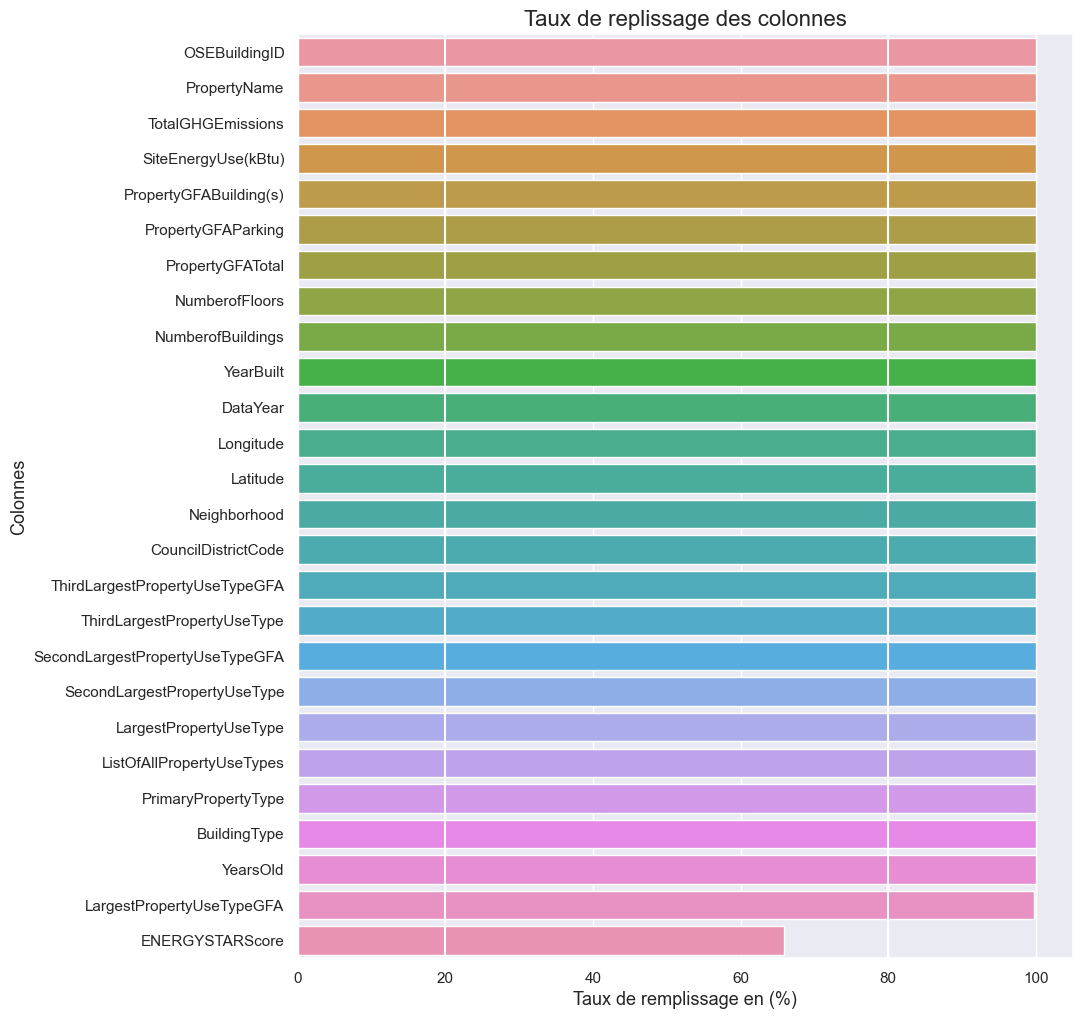

OSEBuildingID PropertyName BuildingType  \
Valeurs manquantes              0            0            0   
Nombre de valeurs            1618         1618         1618   
Taux de remplissage         100.0        100.0        100.0   
Valeurs différentes          1618         1614            5   

                    PrimaryPropertyType ListOfAllPropertyUseTypes  \
Valeurs manquantes                    0                         0   
Nombre de valeurs                  1618                      1618   
Taux de remplissage               100.0                     100.0   
Valeurs différentes                  20                       343   

                    LargestPropertyUseType LargestPropertyUseTypeGFA  \
Valeurs manquantes                       0                         4   
Nombre de valeurs                     1618                      1614   
Taux de remplissage                  100.0                 99.752781   
Valeurs différentes                     55                      1518   

                    SecondLargestPropertyUseType  \
Valeurs manquantes                             0   
Nombre de valeurs                           1618   
Taux de remplissage                        100.0   
Valeurs différentes                           48   

                    SecondLargestPropertyUseTypeGFA  \
Valeurs manquantes                                0   
Nombre de valeurs                              1618   
Taux de remplissage                           100.0   
Valeurs différentes                             671   

                    ThirdLargestPropertyUseType  \
Valeurs manquantes                            0   
Nombre de valeurs                          1618   
Taux de remplissage                       100.0   
Valeurs différentes                          39   

                    ThirdLargestPropertyUseTypeGFA CouncilDistrictCode  \
Valeurs manquantes                               0                   0   
Nombre de valeurs                             1618                1618   
Taux de remplissage                          100.0               100.0   
Valeurs différentes                            279                   7   

                    Neighborhood Latitude Longitude DataYear YearBuilt  \
Valeurs manquantes             0        0         0        0         0   
Nombre de valeurs           1618     1618      1618     1618      1618   
Taux de remplissage        100.0    100.0     100.0    100.0     100.0   
Valeurs différentes           19     1453      1369        1       113   

                    NumberofBuildings NumberofFloors PropertyGFATotal  \
Valeurs manquantes                  0              0                0   
Nombre de valeurs                1618           1618             1618   
Taux de remplissage             100.0          100.0            100.0   
Valeurs différentes                16             44             1542   

                    PropertyGFAParking PropertyGFABuilding(s) ENERGYSTARScore  \
Valeurs manquantes                   0                      0             552   
Nombre de valeurs                 1618                   1618            1066   
Taux de remplissage              100.0                  100.0       65.883807   
Valeurs différentes                315                   1537             100   

                    SiteEnergyUse(kBtu) TotalGHGEmissions YearsOld  
Valeurs manquantes                    0                 0        0  
Nombre de valeurs                  1618              1618     1618  
Taux de remplissage               100.0             100.0    100.0  
Valeurs différentes                1603              1549      113

In [220]:
visu(df)

In [221]:
df_gfa = df.loc[df['LargestPropertyUseTypeGFA'].isnull()]

In [222]:
for l,r in df_gfa.iterrows():
    df.loc[l, 'LargestPropertyUseTypeGFA'] = df.loc[l, 'PropertyGFATotal']

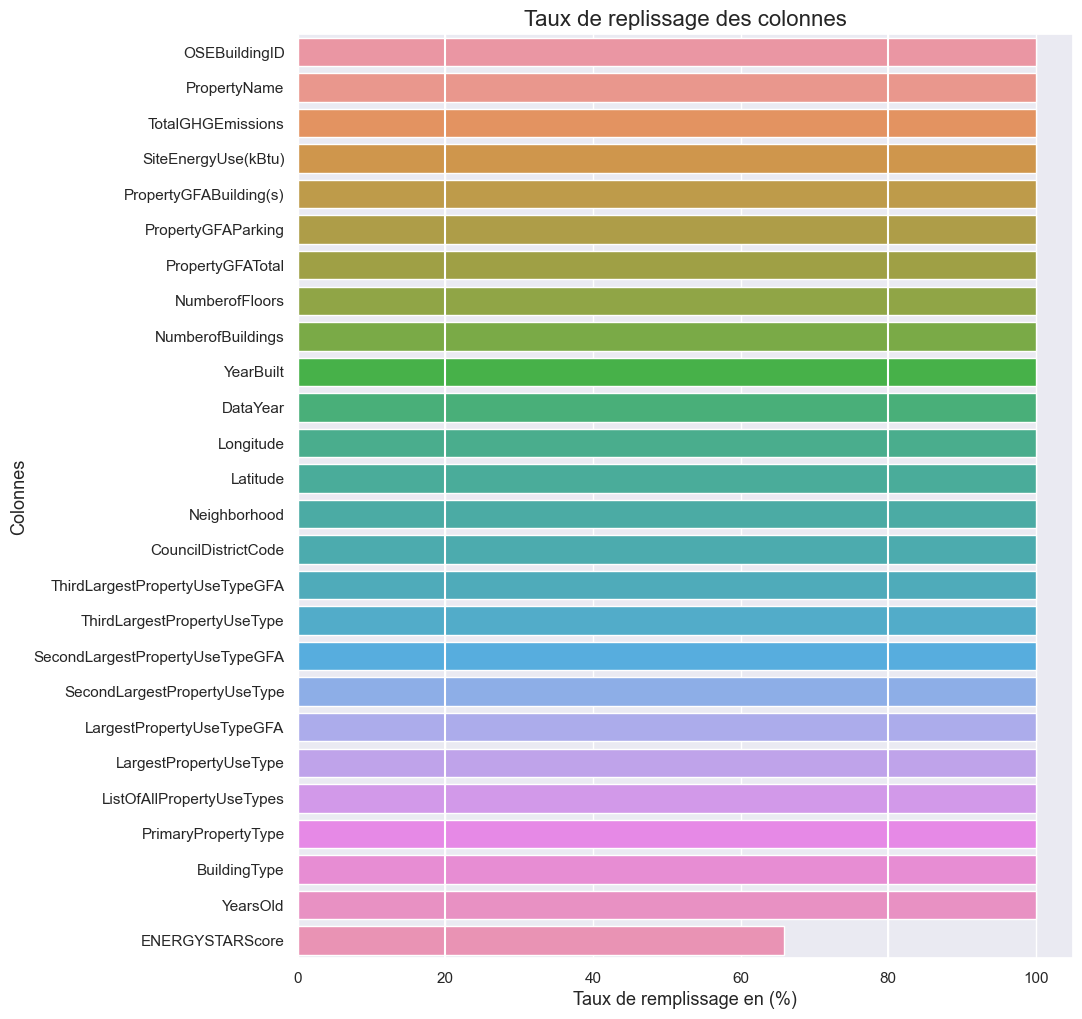

OSEBuildingID PropertyName BuildingType  \
Valeurs manquantes              0            0            0   
Nombre de valeurs            1618         1618         1618   
Taux de remplissage         100.0        100.0        100.0   
Valeurs différentes          1618         1614            5   

                    PrimaryPropertyType ListOfAllPropertyUseTypes  \
Valeurs manquantes                    0                         0   
Nombre de valeurs                  1618                      1618   
Taux de remplissage               100.0                     100.0   
Valeurs différentes                  20                       343   

                    LargestPropertyUseType LargestPropertyUseTypeGFA  \
Valeurs manquantes                       0                         0   
Nombre de valeurs                     1618                      1618   
Taux de remplissage                  100.0                     100.0   
Valeurs différentes                     55                      1521   

                    SecondLargestPropertyUseType  \
Valeurs manquantes                             0   
Nombre de valeurs                           1618   
Taux de remplissage                        100.0   
Valeurs différentes                           48   

                    SecondLargestPropertyUseTypeGFA  \
Valeurs manquantes                                0   
Nombre de valeurs                              1618   
Taux de remplissage                           100.0   
Valeurs différentes                             671   

                    ThirdLargestPropertyUseType  \
Valeurs manquantes                            0   
Nombre de valeurs                          1618   
Taux de remplissage                       100.0   
Valeurs différentes                          39   

                    ThirdLargestPropertyUseTypeGFA CouncilDistrictCode  \
Valeurs manquantes                               0                   0   
Nombre de valeurs                             1618                1618   
Taux de remplissage                          100.0               100.0   
Valeurs différentes                            279                   7   

                    Neighborhood Latitude Longitude DataYear YearBuilt  \
Valeurs manquantes             0        0         0        0         0   
Nombre de valeurs           1618     1618      1618     1618      1618   
Taux de remplissage        100.0    100.0     100.0    100.0     100.0   
Valeurs différentes           19     1453      1369        1       113   

                    NumberofBuildings NumberofFloors PropertyGFATotal  \
Valeurs manquantes                  0              0                0   
Nombre de valeurs                1618           1618             1618   
Taux de remplissage             100.0          100.0            100.0   
Valeurs différentes                16             44             1542   

                    PropertyGFAParking PropertyGFABuilding(s) ENERGYSTARScore  \
Valeurs manquantes                   0                      0             552   
Nombre de valeurs                 1618                   1618            1066   
Taux de remplissage              100.0                  100.0       65.883807   
Valeurs différentes                315                   1537             100   

                    SiteEnergyUse(kBtu) TotalGHGEmissions YearsOld  
Valeurs manquantes                    0                 0        0  
Nombre de valeurs                  1618              1618     1618  
Taux de remplissage               100.0             100.0    100.0  
Valeurs différentes                1603              1549      113

In [223]:
visu(df)

In [224]:
df.describe()

OSEBuildingID  LargestPropertyUseTypeGFA  \
count    1618.000000               1.618000e+03   
mean    16106.195303               9.947223e+04   
std     13757.390395               2.800286e+05   
min         1.000000               5.656000e+03   
25%       574.250000               2.575525e+04   
50%     21118.000000               4.432000e+04   
75%     24562.250000               9.200450e+04   
max     50226.000000               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1618.000000                     1618.000000   
mean                      18526.330221                     2819.190605   
std                       52755.399566                    17189.867618   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       12181.500000                        0.000000   
max                      686750.000000                   459748.000000   

       CouncilDistrictCode     Latitude    Longitude  DataYear    YearBuilt  \
count          1618.000000  1618.000000  1618.000000    1618.0  1618.000000   
mean              4.340544    47.615511  -122.333038    2016.0  1962.078492   
std               2.202399     0.048601     0.024725       0.0    32.401385   
min               1.000000    47.499170  -122.411820    2016.0  1900.000000   
25%               2.000000    47.584225  -122.343365    2016.0  1930.250000   
50%               4.000000    47.612069  -122.333000    2016.0  1965.000000   
75%               7.000000    47.648962  -122.321842    2016.0  1989.000000   
max               7.000000    47.733870  -122.258640    2016.0  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        1618.000000     1618.000000      1.618000e+03   
mean            1.171817        4.101978      1.186667e+05   
std             2.972169        6.580841      2.993482e+05   
min             0.000000        0.000000      1.128500e+04   
25%             1.000000        1.000000      2.954850e+04   
50%             1.000000        2.000000      4.925050e+04   
75%             1.000000        4.000000      1.040742e+05   
max           111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  ENERGYSTARScore  \
count         1618.000000            1.618000e+03      1066.000000   
mean         12935.174289            1.057315e+05        65.435272   
std          42507.296965            2.865084e+05        28.557759   
min              0.000000            3.636000e+03         1.000000   
25%              0.000000            2.849400e+04        48.000000   
50%              0.000000            4.731650e+04        73.000000   
75%              0.000000            9.447150e+04        89.000000   
max         512608.000000            9.320156e+06       100.000000   

       SiteEnergyUse(kBtu)  TotalGHGEmissions     YearsOld  
count         1.618000e+03        1618.000000  1618.000000  
mean          8.521056e+06         186.993436    53.921508  
std           3.065769e+07         762.554076    32.401385  
min           0.000000e+00          -0.800000     1.000000  
25%           1.217660e+06          19.830000    27.000000  
50%           2.546626e+06          49.265000    51.000000  
75%           6.917429e+06         142.382500    85.750000  
max           8.739237e+08       16870.980000   116.000000

## Analyse Univariée

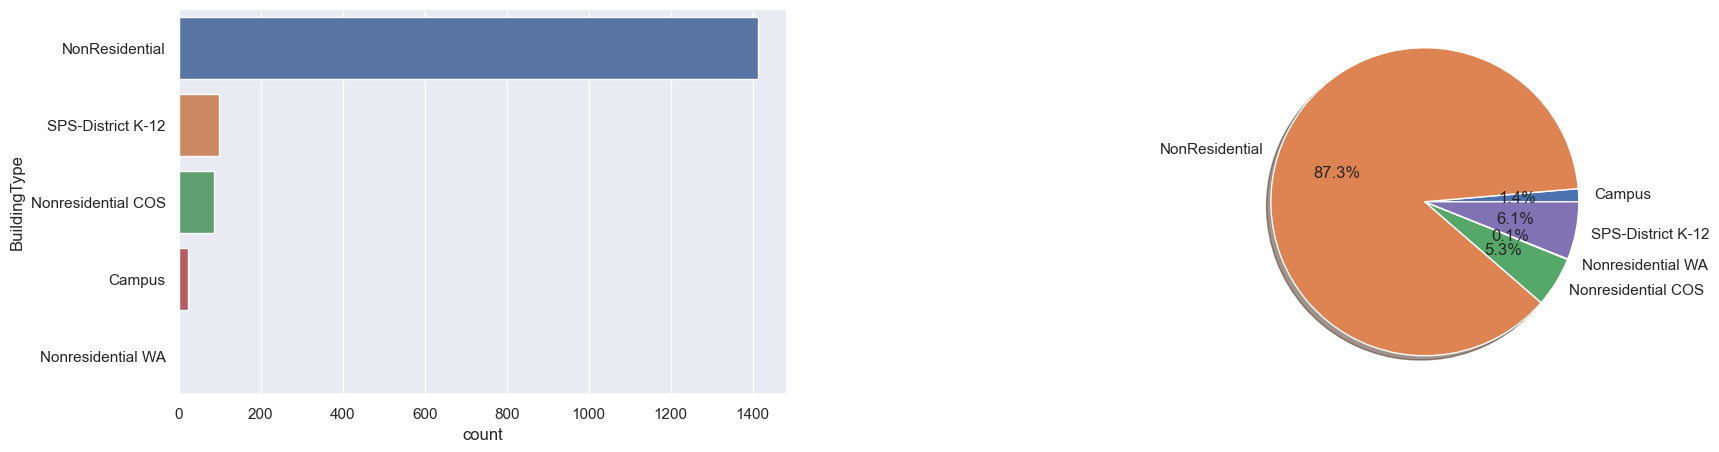

In [225]:
properties = df['BuildingType'].value_counts()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(y = df['BuildingType'], order= properties.index)
plt.subplot(1,2,2)
properties = df['BuildingType'].value_counts()
properties = properties.sort_index()
plt.pie(properties, labels= properties.index, autopct='%1.1f%%', shadow=True)
plt.subplots_adjust(hspace=0.45,wspace=0.55)
plt.show()

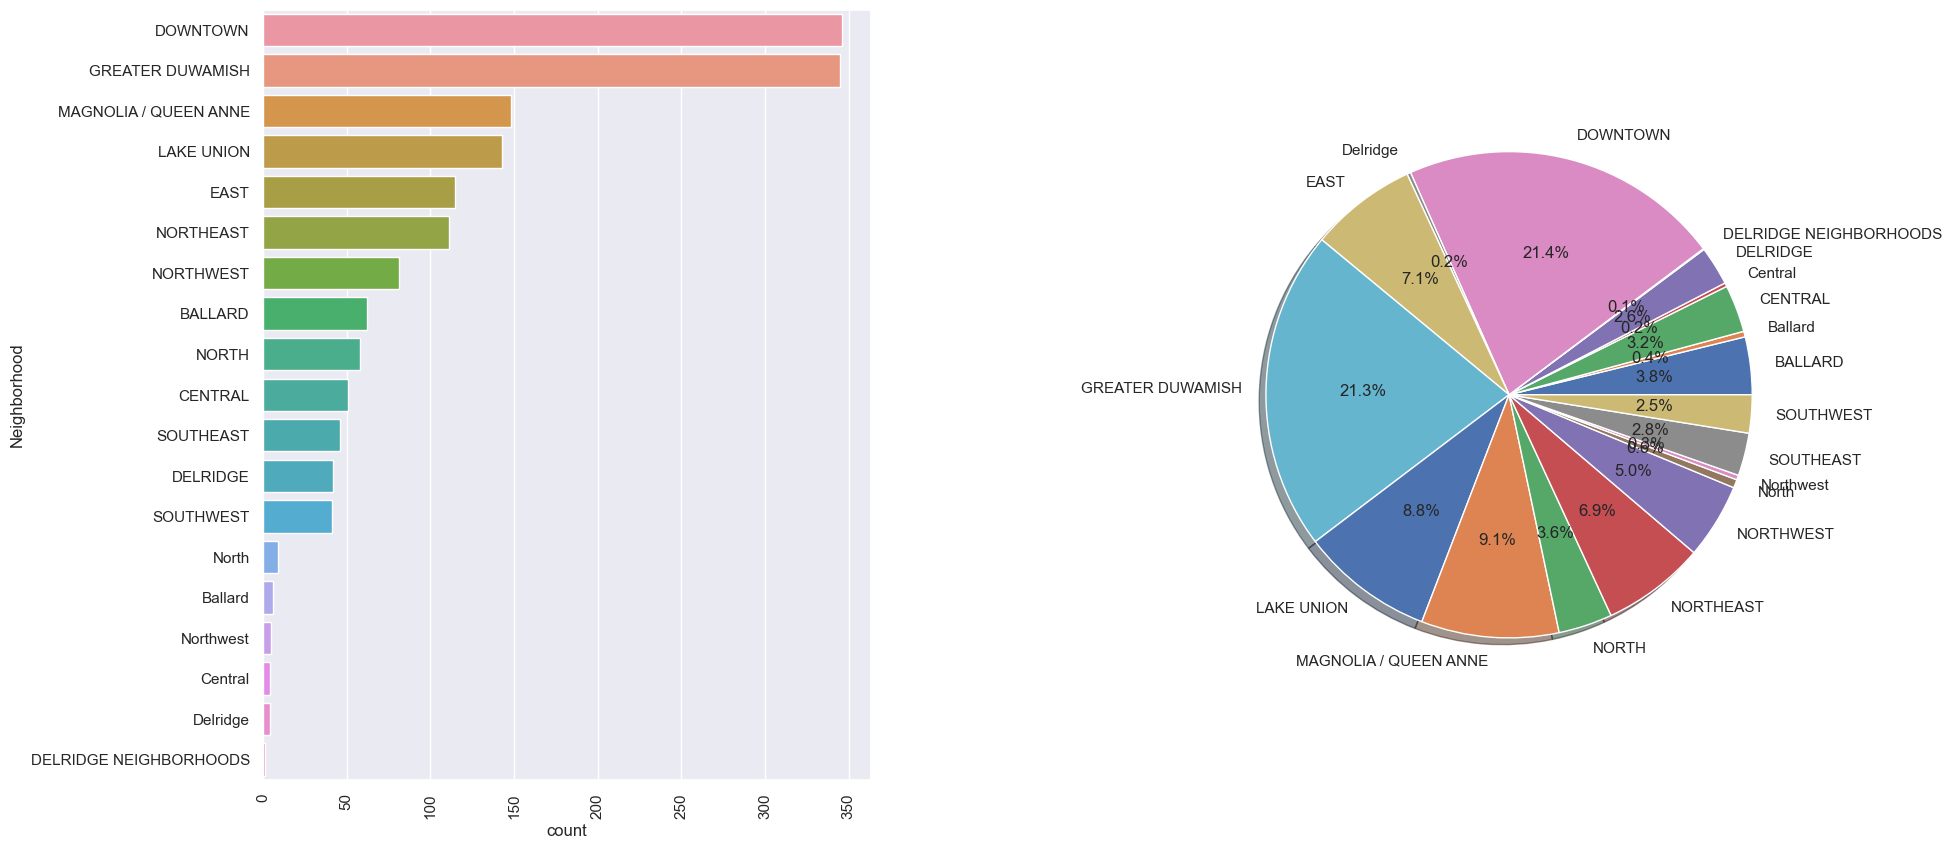

In [226]:
properties = df['Neighborhood'].value_counts()
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(y = df['Neighborhood'], order= properties.index)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
properties = properties.sort_index()
plt.pie(properties, labels= properties.index, autopct='%1.1f%%', shadow=True)
plt.subplots_adjust(hspace=0.45,wspace=0.55)
plt.show()

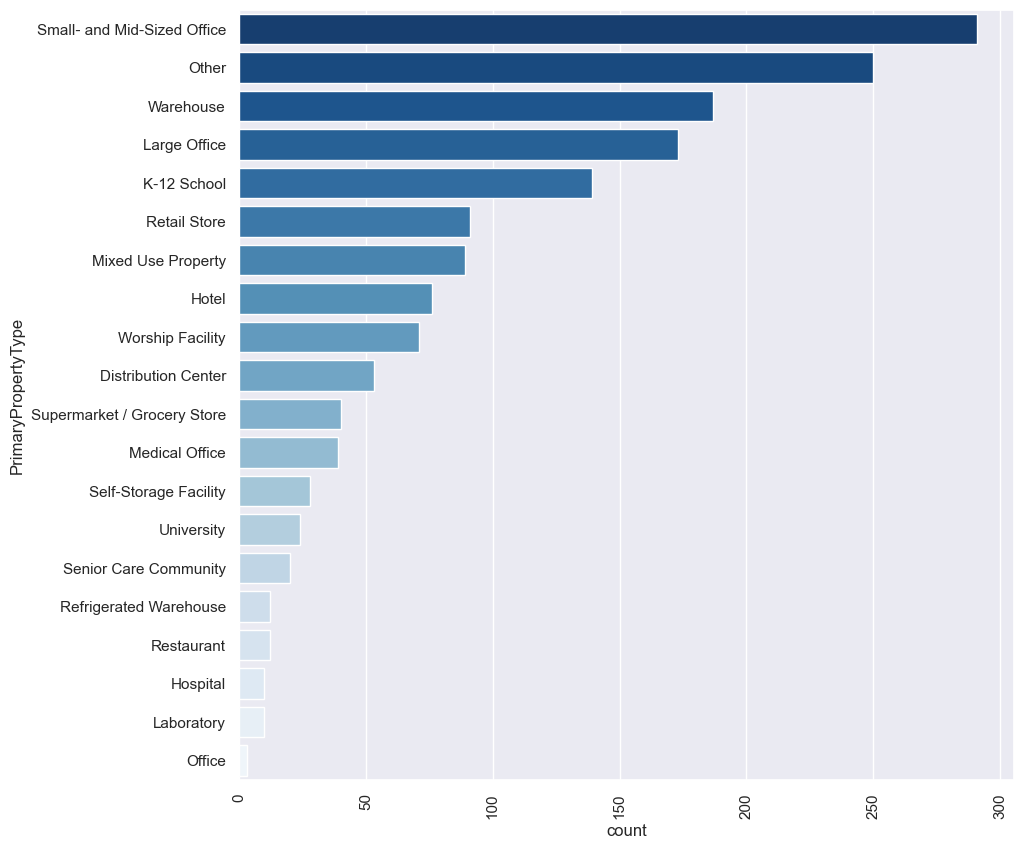

In [274]:
properties = df['PrimaryPropertyType'].value_counts()

plt.figure(figsize=(10,10))
sns.countplot(y = df['PrimaryPropertyType'], order= properties.index, palette='Blues_r')
plt.xticks(rotation=90)
plt.savefig("./Visualisations/PrimaryPropertyType1", bbox_inches='tight')
plt.show()

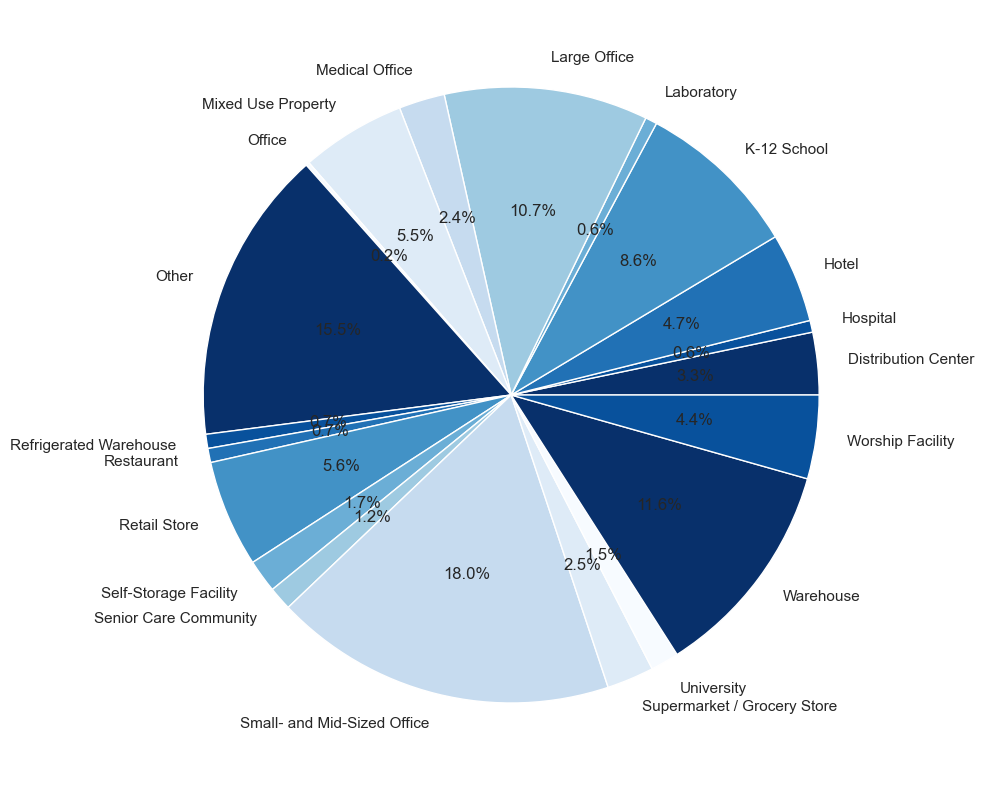

In [278]:
pal = ['#08306B',
'#08519C',
'#2171B5',
'#4292C6',
'#6BAED6',
'#9ECAE1',
'#C6DBEF',
'#DEEBF7',
'#F7FBFF']
properties = properties.sort_index()
plt.figure(figsize=(10,10))
plt.pie(properties, labels= properties.index, autopct='%1.1f%%', shadow=False, colors=pal)
plt.subplots_adjust(hspace=0.45,wspace=0.45)
plt.savefig("./Visualisations/PrimaryPropertyType2")
plt.show()

<AxesSubplot:>

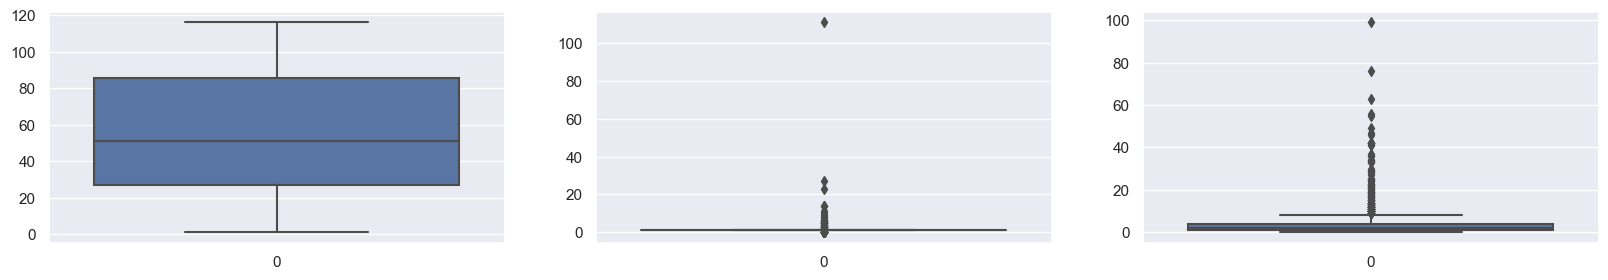

In [228]:
plt.figure(figsize=(20,3))
plt.subplot(1,3,1)
sns.boxplot(df['YearsOld'])
plt.subplot(1,3,2)
sns.boxplot(df['NumberofBuildings'])
plt.subplot(1,3,3)
sns.boxplot(df['NumberofFloors'])

<AxesSubplot:>

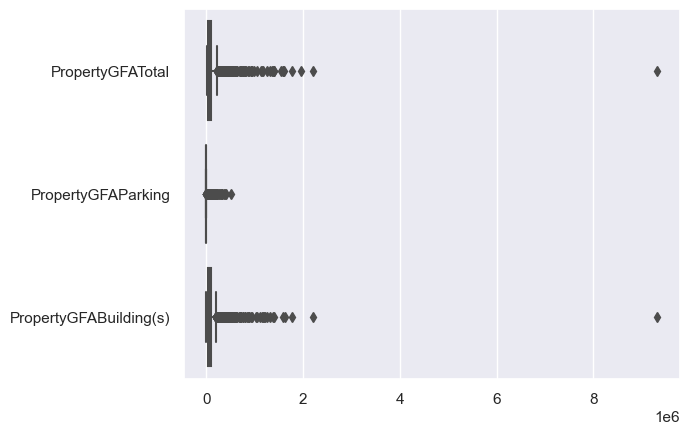

In [229]:
sns.boxplot(data = df[['PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)']],orient='h')


<AxesSubplot:>

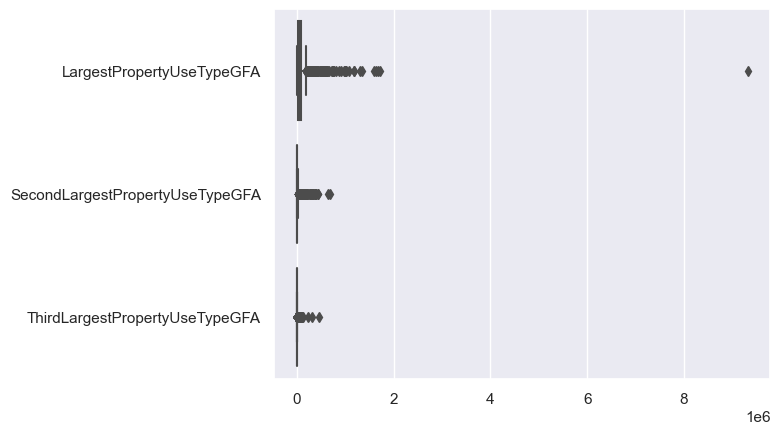

In [230]:
sns.boxplot(data = df[['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']],orient='h')

<AxesSubplot:>

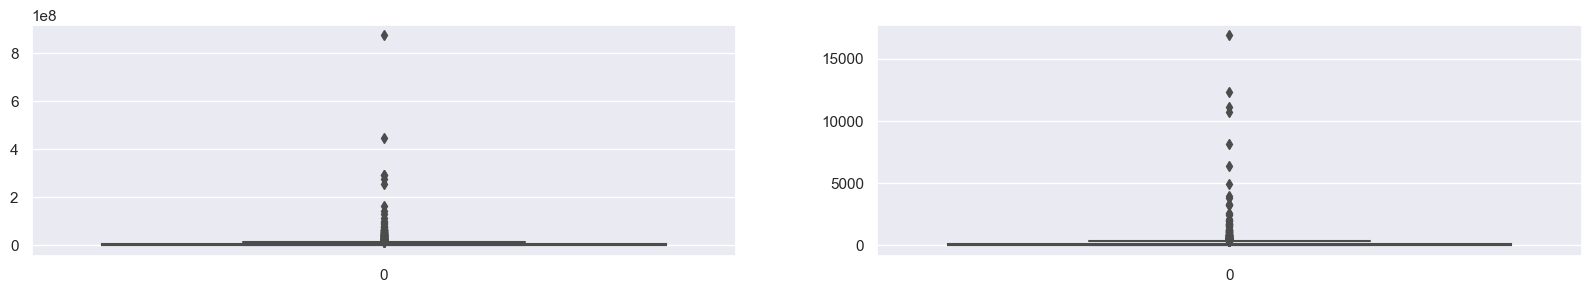

In [231]:
plt.figure(figsize=(20,3))
plt.subplot(1,2,1)
sns.boxplot(df['SiteEnergyUse(kBtu)'])
plt.subplot(1,2,2)
sns.boxplot(df['TotalGHGEmissions'])

In [232]:
df.loc[df['NumberofBuildings'] == 111]

OSEBuildingID                               PropertyName BuildingType  \
3274          49967  University of Washington - Seattle Campus       Campus   

     PrimaryPropertyType ListOfAllPropertyUseTypes LargestPropertyUseType  \
3274          University        College/University     College/University   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
3274                  9320156.0                  NotOtherUse   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
3274                              0.0                 NotOtherUse   

      ThirdLargestPropertyUseTypeGFA  CouncilDistrictCode Neighborhood  \
3274                             0.0                    4    NORTHEAST   

      Latitude  Longitude  DataYear  YearBuilt  NumberofBuildings  \
3274  47.65644 -122.31041      2016       1900              111.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
3274               0           9320156                   0   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
3274                 9320156              NaN          873923712.0   

      TotalGHGEmissions  YearsOld  
3274           11140.56       116

## Analyse Bivariée

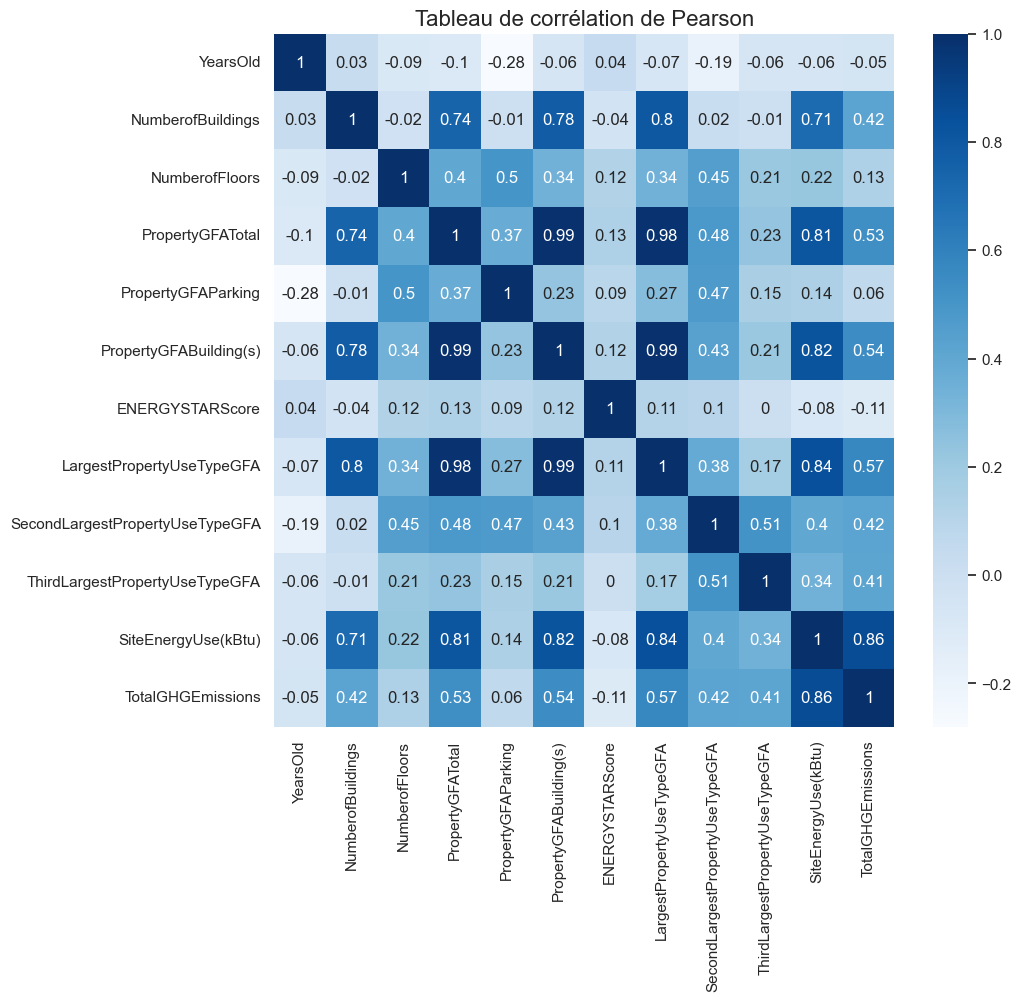

In [283]:
quant = ['YearsOld','NumberofBuildings',
       'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)',
       'ENERGYSTARScore','LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions']

plt.figure(figsize =(10,9))
sns.heatmap(df[quant].corr().round(2), annot=True, cmap='Blues')
plt.title("Tableau de corrélation de Pearson", fontsize=16)
plt.savefig("./Visualisations/Cor_1", bbox_inches='tight')
plt.show()

<Figure size 2000x2000 with 0 Axes>

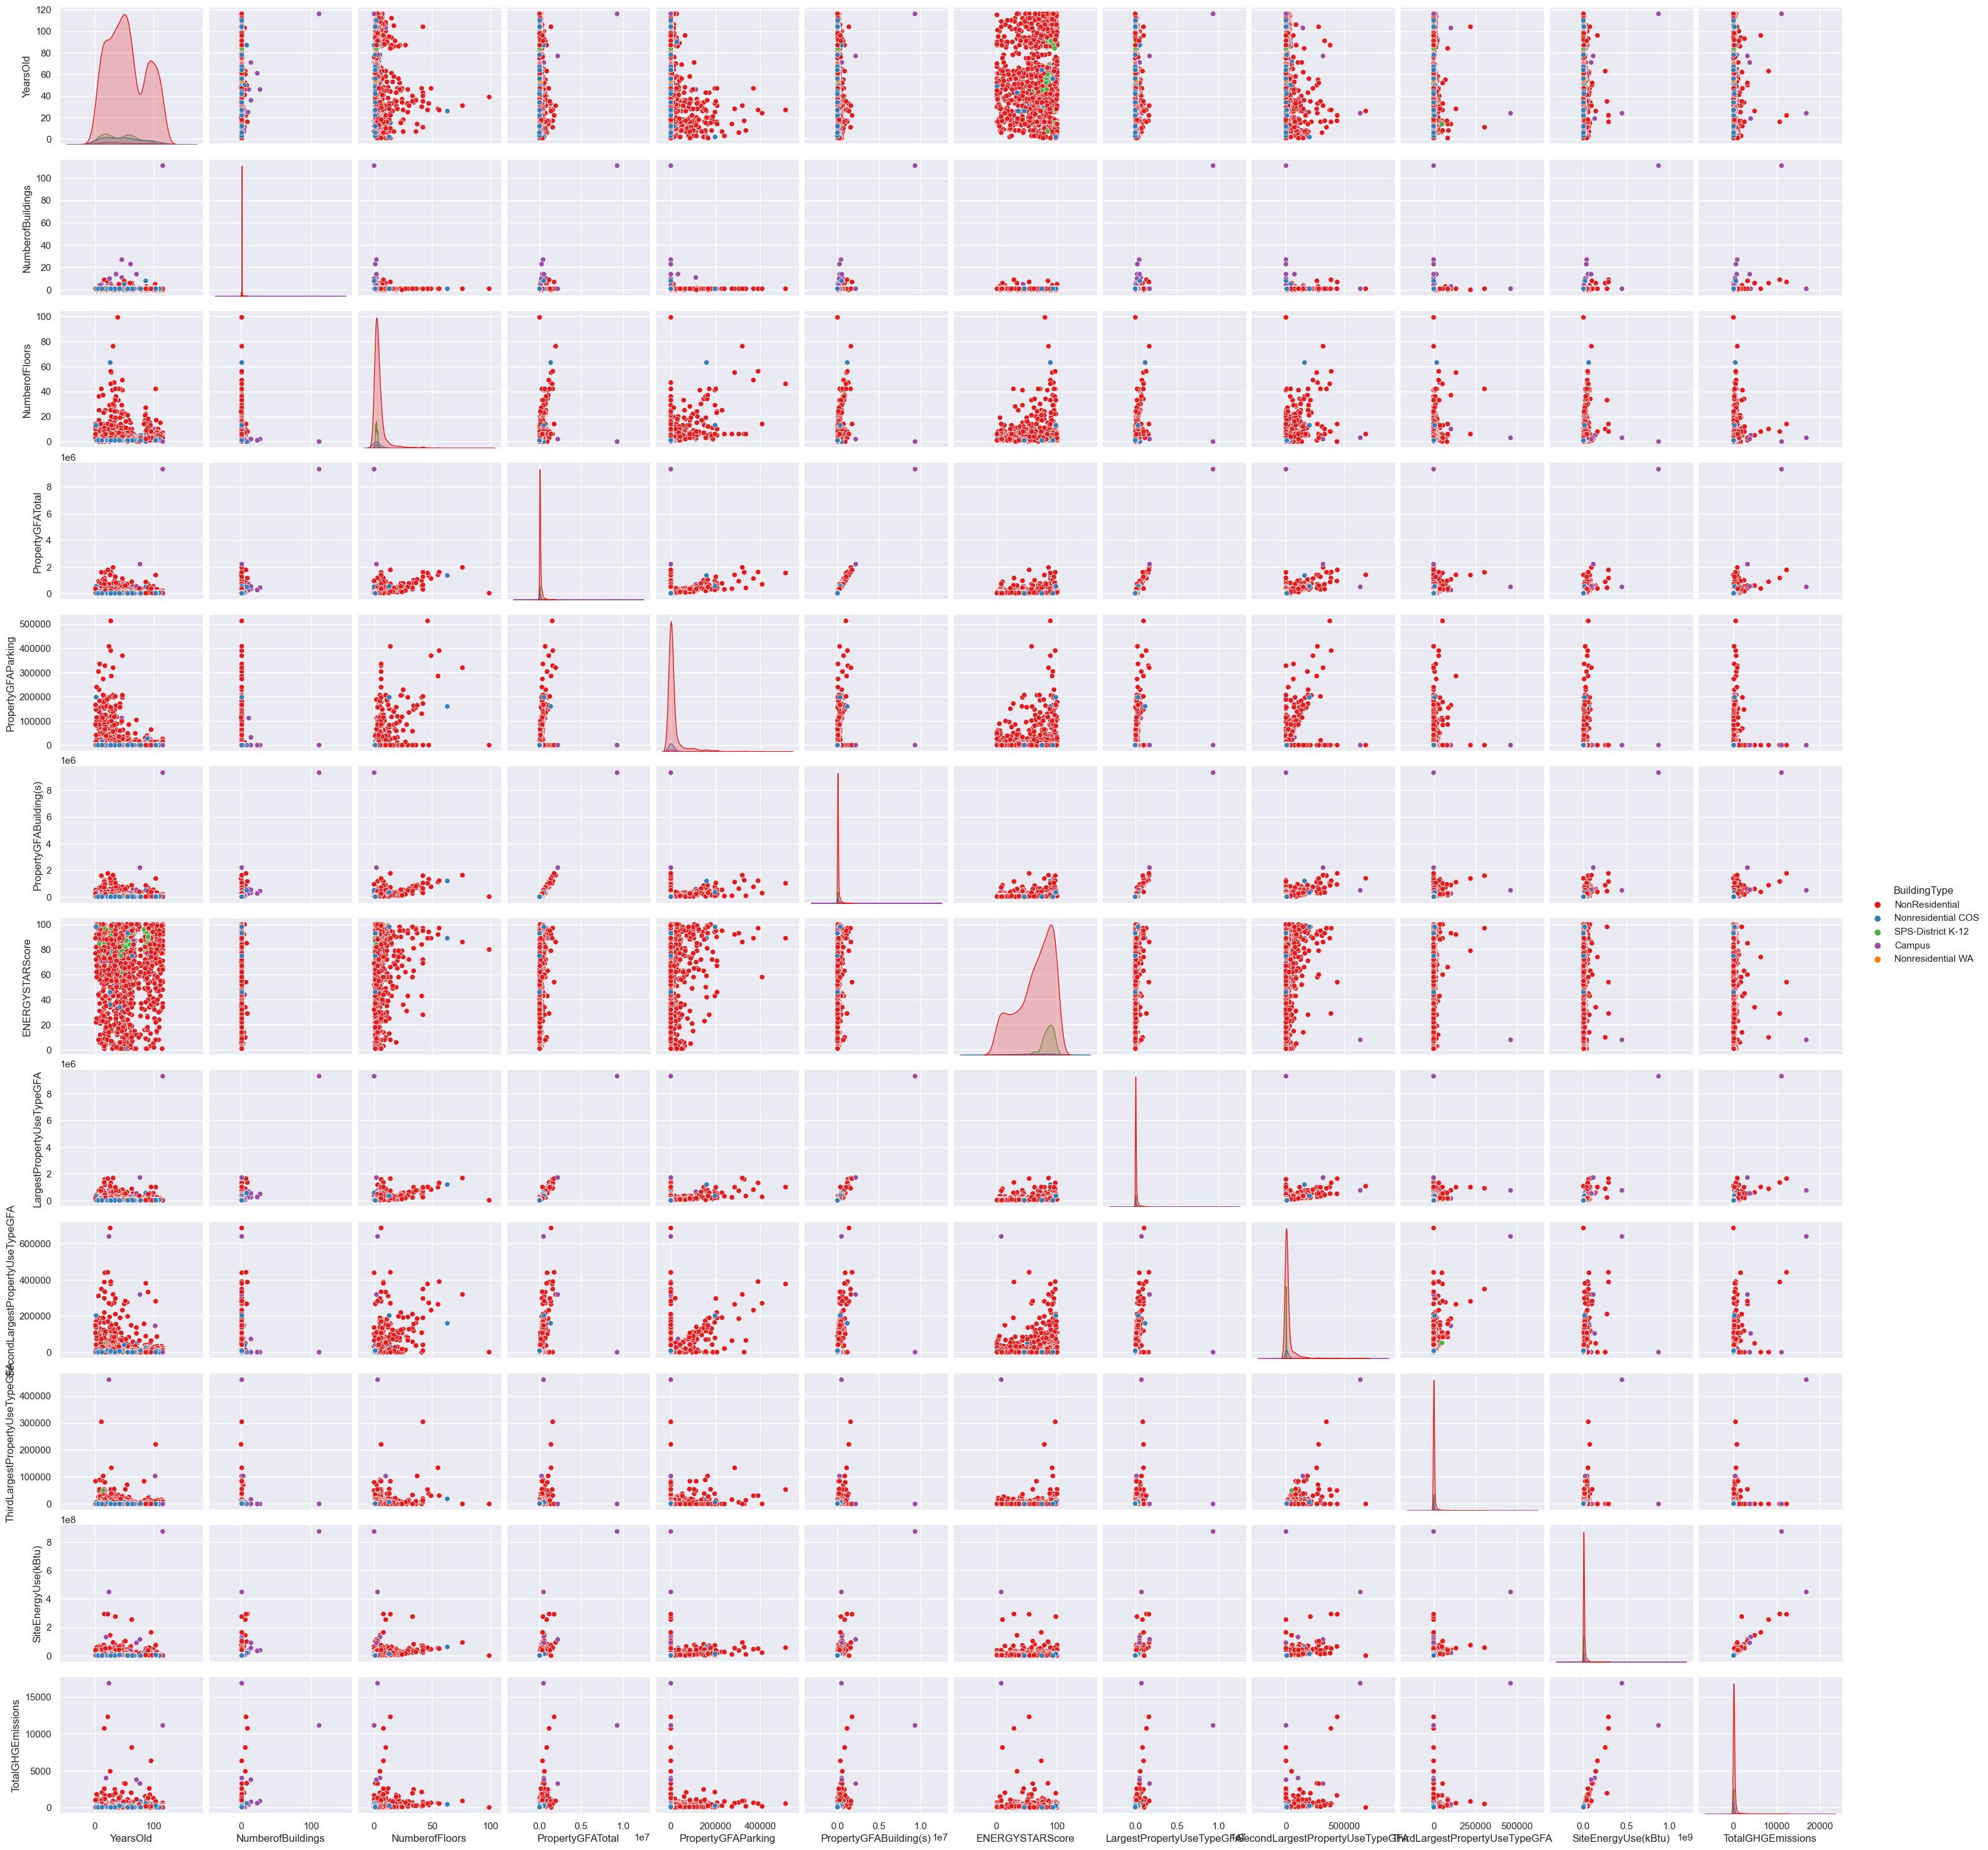

In [235]:
plt.figure(figsize = (20,20))
sns.pairplot(df[quant], hue='BuildingType', palette = 'Set1')
plt.show()

In [236]:
df_b = df[quant].drop(['BuildingType'],axis=1).values

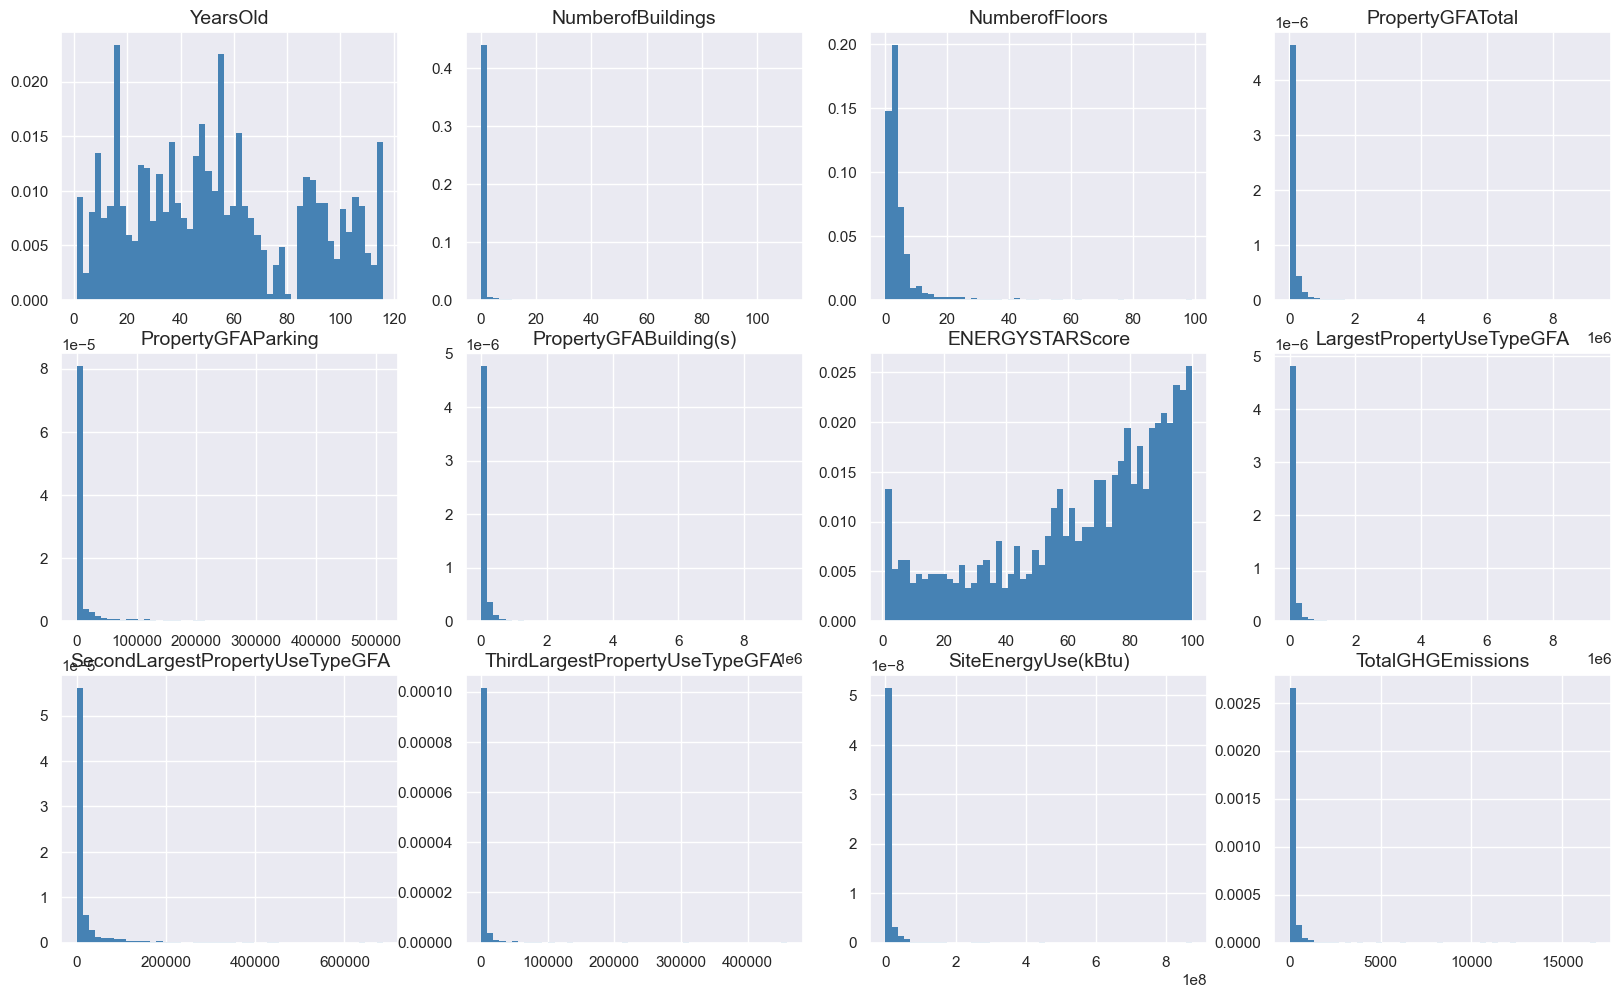

In [237]:
fig = plt.figure(figsize=(20, 16))
for feat_idx in range(df_b.shape[1]):
    ax = fig.add_subplot(4,4, (feat_idx+1))
    h = ax.hist(df_b[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(df[quant].drop(['BuildingType'],axis=1).columns[feat_idx], fontsize=14)
plt.show()

In [238]:
df_c = df[quant].drop(['BuildingType'],axis=1)

In [239]:
 df_d = np.log1p(df_c.drop(['YearsOld','ENERGYSTARScore'], axis=1)).values

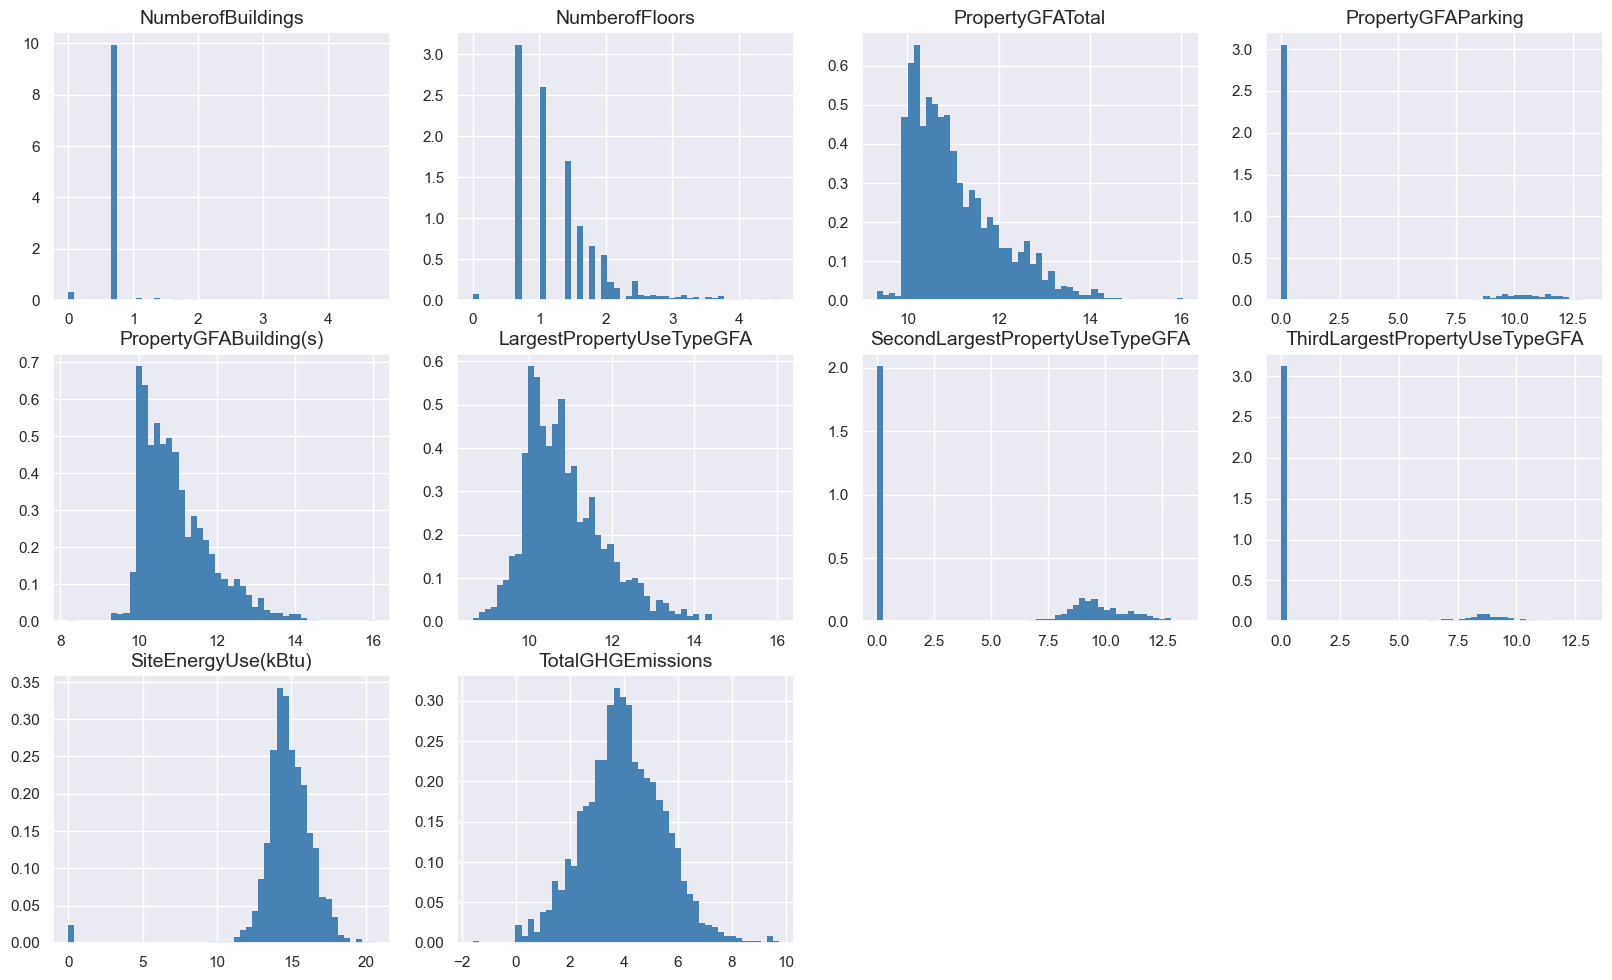

In [240]:
fig = plt.figure(figsize=(20, 16))
for feat_idx in range(df_d.shape[1]):
    ax = fig.add_subplot(4,4, (feat_idx+1))
    h = ax.hist(df_d[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(df_c.drop(['YearsOld','ENERGYSTARScore'], axis=1).columns[feat_idx], fontsize=14)
plt.show()

Création de variable plus pertinentes:

- Liste de nombre d'utilisation du batiment
- Pourcentage de surface utilisé


In [241]:
for n, l in df.iterrows():
    if df.loc[n,'SecondLargestPropertyUseType'] != 'NotOtherUse':
        if df.loc[n,'ThirdLargestPropertyUseType'] != 'NotOtherUse':
            df.loc[n, 'NumberUses'] = 3
        else:
            df.loc[n, 'NumberUses'] = 2
    else:
        df.loc[n, 'NumberUses'] = 1
        
df

OSEBuildingID                         PropertyName        BuildingType  \
0                 1                 Mayflower park hotel      NonResidential   
1                 2                      Paramount Hotel      NonResidential   
2                 3              5673-The Westin Seattle      NonResidential   
3                 5                            HOTEL MAX      NonResidential   
4                 8          WARWICK SEATTLE HOTEL (ID8)      NonResidential   
...             ...                                  ...                 ...   
3371          50222                Horticulture building  Nonresidential COS   
3372          50223  International district/Chinatown CC  Nonresidential COS   
3373          50224                      Queen Anne Pool  Nonresidential COS   
3374          50225          South Park Community Center  Nonresidential COS   
3375          50226          Van Asselt Community Center  Nonresidential COS   

     PrimaryPropertyType                          ListOfAllPropertyUseTypes  \
0                  Hotel                                              Hotel   
1                  Hotel                         Hotel, Parking, Restaurant   
2                  Hotel                                              Hotel   
3                  Hotel                                              Hotel   
4                  Hotel                      Hotel, Parking, Swimming Pool   
...                  ...                                                ...   
3371              Office                                             Office   
3372               Other                                 Other - Recreation   
3373               Other  Fitness Center/Health Club/Gym, Other - Recrea...   
3374  Mixed Use Property  Fitness Center/Health Club/Gym, Food Service, ...   
3375  Mixed Use Property  Fitness Center/Health Club/Gym, Food Service, ...   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                     Hotel                    88434.0   
1                     Hotel                    83880.0   
2                     Hotel                   756493.0   
3                     Hotel                    61320.0   
4                     Hotel                   123445.0   
...                     ...                        ...   
3371                 Office                    12294.0   
3372     Other - Recreation                    16000.0   
3373     Other - Recreation                     7583.0   
3374     Other - Recreation                     6601.0   
3375     Other - Recreation                     8271.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                        NotOtherUse                              0.0   
1                            Parking                          15064.0   
2                        NotOtherUse                              0.0   
3                        NotOtherUse                              0.0   
4                            Parking                          68009.0   
...                              ...                              ...   
3371                     NotOtherUse                              0.0   
3372                     NotOtherUse                              0.0   
3373  Fitness Center/Health Club/Gym                           5574.0   
3374  Fitness Center/Health Club/Gym                           6501.0   
3375  Fitness Center/Health Club/Gym                           8000.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                    NotOtherUse                             0.0   
1                     Restaurant                          4622.0   
2                    NotOtherUse                             0.0   
3                    NotOtherUse                             0.0   
4                  Swimming Pool                             0.0   
...                          ...                             ...   
3371                 NotOtherUse              

In [242]:
df.loc[:,'%LargestUseGFA'] = (df['LargestPropertyUseTypeGFA']/df['PropertyGFATotal'])
df.loc[:,'%SecondUseGFA'] = df['SecondLargestPropertyUseTypeGFA']/df['PropertyGFATotal']
df.loc[:,'%ThirdUseGFA'] = df['ThirdLargestPropertyUseTypeGFA']/df['PropertyGFATotal']

df.loc[:,'%BuildingGFA'] = df['PropertyGFABuilding(s)']/df['PropertyGFATotal']
df.loc[:,'%ParkingGFA'] = df['PropertyGFAParking']/df['PropertyGFATotal']

df

OSEBuildingID                         PropertyName        BuildingType  \
0                 1                 Mayflower park hotel      NonResidential   
1                 2                      Paramount Hotel      NonResidential   
2                 3              5673-The Westin Seattle      NonResidential   
3                 5                            HOTEL MAX      NonResidential   
4                 8          WARWICK SEATTLE HOTEL (ID8)      NonResidential   
...             ...                                  ...                 ...   
3371          50222                Horticulture building  Nonresidential COS   
3372          50223  International district/Chinatown CC  Nonresidential COS   
3373          50224                      Queen Anne Pool  Nonresidential COS   
3374          50225          South Park Community Center  Nonresidential COS   
3375          50226          Van Asselt Community Center  Nonresidential COS   

     PrimaryPropertyType                          ListOfAllPropertyUseTypes  \
0                  Hotel                                              Hotel   
1                  Hotel                         Hotel, Parking, Restaurant   
2                  Hotel                                              Hotel   
3                  Hotel                                              Hotel   
4                  Hotel                      Hotel, Parking, Swimming Pool   
...                  ...                                                ...   
3371              Office                                             Office   
3372               Other                                 Other - Recreation   
3373               Other  Fitness Center/Health Club/Gym, Other - Recrea...   
3374  Mixed Use Property  Fitness Center/Health Club/Gym, Food Service, ...   
3375  Mixed Use Property  Fitness Center/Health Club/Gym, Food Service, ...   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                     Hotel                    88434.0   
1                     Hotel                    83880.0   
2                     Hotel                   756493.0   
3                     Hotel                    61320.0   
4                     Hotel                   123445.0   
...                     ...                        ...   
3371                 Office                    12294.0   
3372     Other - Recreation                    16000.0   
3373     Other - Recreation                     7583.0   
3374     Other - Recreation                     6601.0   
3375     Other - Recreation                     8271.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                        NotOtherUse                              0.0   
1                            Parking                          15064.0   
2                        NotOtherUse                              0.0   
3                        NotOtherUse                              0.0   
4                            Parking                          68009.0   
...                              ...                              ...   
3371                     NotOtherUse                              0.0   
3372                     NotOtherUse                              0.0   
3373  Fitness Center/Health Club/Gym                           5574.0   
3374  Fitness Center/Health Club/Gym                           6501.0   
3375  Fitness Center/Health Club/Gym                           8000.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                    NotOtherUse                             0.0   
1                     Restaurant                          4622.0   
2                    NotOtherUse                             0.0   
3                    NotOtherUse                             0.0   
4                  Swimming Pool                             0.0   
...                          ...                             ...   
3371                 NotOtherUse              

In [243]:
df[['%LargestUseGFA','%SecondUseGFA','%ThirdUseGFA','%BuildingGFA','%ParkingGFA']] = round(df[['%LargestUseGFA','%SecondUseGFA','%ThirdUseGFA','%BuildingGFA','%ParkingGFA']], 2)

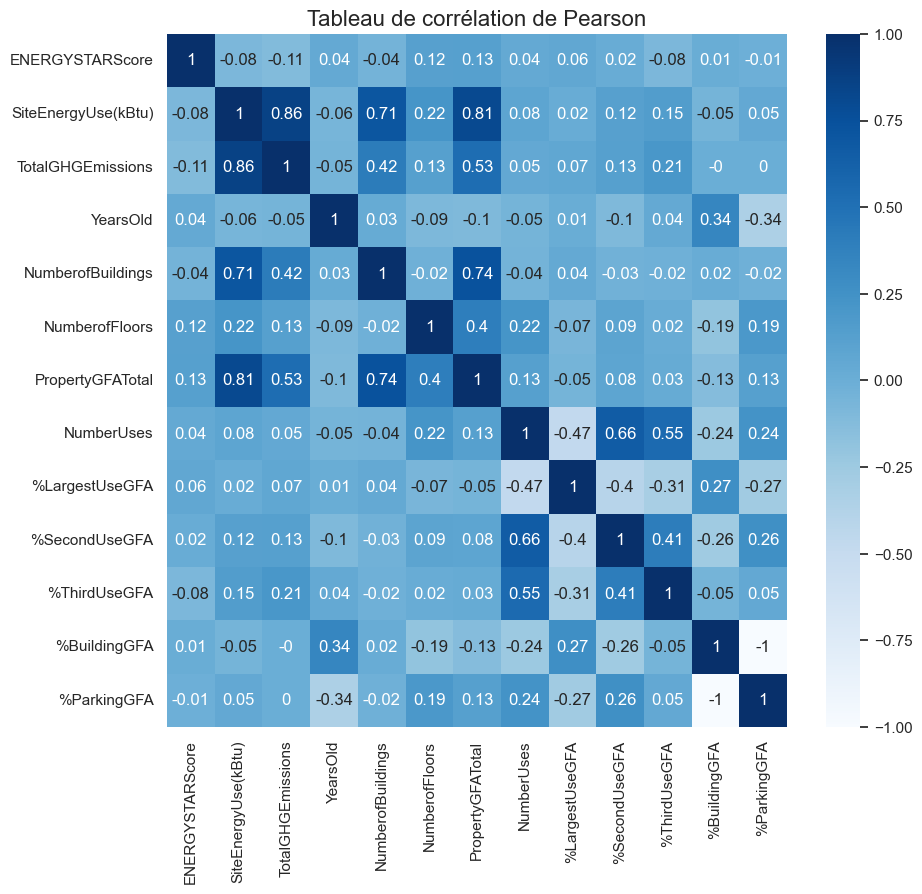

In [285]:
var = ['ENERGYSTARScore','SiteEnergyUse(kBtu)','TotalGHGEmissions','YearsOld','NumberofBuildings','NumberofFloors','PropertyGFATotal','NumberUses','%LargestUseGFA','%SecondUseGFA','%ThirdUseGFA','%BuildingGFA','%ParkingGFA']

plt.figure(figsize =(10,9))
sns.heatmap(df[var].corr().round(2), annot=True, cmap='Blues')
plt.title("Tableau de corrélation de Pearson", fontsize=16)
plt.savefig("./Visualisations/Cor_2", bbox_inches='tight')
plt.show()

In [245]:
df.to_csv("./Data/DonnéesNettoyées.csv")

In [253]:
df.shape

(1618, 32)